In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold

# Lets load our PPMI dataset

In [2]:
PPMI = pd.read_csv('E:\ML in neuro\FC_Mohammad.csv')

In [3]:
PPMI

Subject    Group Sex  Age  lLPFC and rPPC  lLPFC and lIFG  \
0          1       PD   M   71       -0.103246        0.350126   
1          2       PD   M   75        0.321440        0.384504   
2          3       PD   F   54       -0.060092        0.348650   
3          4       PD   M   67       -2.048700        1.145381   
4          5       PD   F   61        0.104956        0.450186   
..       ...      ...  ..  ...             ...             ...   
141      142  Control   F   65        0.208877        0.527658   
142      143  Control   F   66        0.145393        0.416814   
143      144  Control   M   72        0.070322       -0.165584   
144      145  Control   F   30        0.969361       -0.583140   
145      146  Control   F   49       -0.455984       -0.165939   

     lLPFC and rIFG  lLPFC and lpSTG  lLPFC and rpSTG  lPPC and rLPFC  ...  \
0          0.394340        -0.576904        -0.039407       -0.465657  ...   
1         -1.041718         0.199509         0.155007        0.151488  ...   
2         -0.115624         0.025965        -0.537761        0.875136  ...   
3         -0.138926        -0.310826        -1.264406        0.613881  ...   
4          0.126491         0.160993        -0.853711        0.766645  ...   
..              ...              ...              ...             ...  ...   
141       -0.121582         0.890016        -0.689229        0.169960  ...   
142       -0.705539        -0.971823         0.096652        0.343644  ...   
143        0.253232         0.400744         0.409499        0.316525  ...   
144       -0.764163        -0.735485        -0.873675       -0.118595  ...   
145        0.264492        -0.162094         1.351596        0.488672  ...   

     rPPC and lIFG  rPPC and rIFG  rPPC and lpSTG  rPPC and rpSTG  \
0         0.586340       0.123240        1.116462        1.991402   
1         0.660146      -0.506504        0.545130        1.194057   
2         1.034337       0.650386        1.076177        0.532748   
3        -0.786227       0.328857        0.142990        1.312452   
4        -0.052218       0.376734        0.294777       -0.265599   
..             ...            ...             ...             ...   
141      -0.405886       0.069582        0.678912        0.181889   
142       0.797781       0.648840        0.000723        0.394908   
143      -0.000253       0.310873        0.522322        0.322046   
144      -0.813304      -1.121430       -0.927283       -0.942936   
145       0.533388      -0.282620        0.748634       -0.302218   

     lIFG and rIFG  lIFG and lpSTG  lIFG and rpSTG  rIFG and lpSTG   \
0        -0.202862        0.191020        0.700737        -0.243791   
1        -0.113396        0.578819        0.277461        -0.127428   
2         0.908516        1.403653        0.624336         1.218256   
3         0.356541       -0.701987       -0.695071        -1.386374   
4         0.676890       -0.416838       -0.749584        -0.910490   
..             ...             ...             ...              ...   
141       0.294484       -0.123988       -0.245210        -0.294329   
142       0.446373        0.090323        0.547290         0.966238   
143       0.648687        0.716026        0.936013         1.556792   
144       1.004450        0.803312        0.786546         1.733911   
145       0.277786        1.161715        0.045713         0.373485   

     rIFG and  rpSTG  lpSTG and rpSTG  
0           0.011227         1.094555  
1          -0.469112         0.802674  
2           0.901400         0.803128  
3          -0.051156         0.563862  
4          -0.431458        -0.022669  
..               ...              ...  
141        -0.210474        -0.279567  
142         0.470560         0.486163  
143         1.211635         1.894386  
144         1.665241         1.206069  
145         0.358893         0.139802  

[146 rows x 30 columns]

In [4]:
PPMI['Group'] = PPMI['Group'].str.strip()
PPMI['Group'] = PPMI['Group'].replace({'PD': 1, 'Control': 2})
PPMI['Group'] = PPMI['Group'].astype(int)

In [5]:
PPMI['Sex'] = PPMI['Sex'].str.strip()
PPMI['Sex'] = PPMI['Sex'].replace({'M': 1, 'F': 2})
PPMI['Sex'] = PPMI['Sex'].astype(int)

In [6]:
PPMI

Subject  Group  Sex  Age  lLPFC and rPPC  lLPFC and lIFG  lLPFC and rIFG  \
0          1      1    1   71       -0.103246        0.350126        0.394340   
1          2      1    1   75        0.321440        0.384504       -1.041718   
2          3      1    2   54       -0.060092        0.348650       -0.115624   
3          4      1    1   67       -2.048700        1.145381       -0.138926   
4          5      1    2   61        0.104956        0.450186        0.126491   
..       ...    ...  ...  ...             ...             ...             ...   
141      142      2    2   65        0.208877        0.527658       -0.121582   
142      143      2    2   66        0.145393        0.416814       -0.705539   
143      144      2    1   72        0.070322       -0.165584        0.253232   
144      145      2    2   30        0.969361       -0.583140       -0.764163   
145      146      2    2   49       -0.455984       -0.165939        0.264492   

     lLPFC and lpSTG  lLPFC and rpSTG  lPPC and rLPFC  ...  rPPC and lIFG  \
0          -0.576904        -0.039407       -0.465657  ...       0.586340   
1           0.199509         0.155007        0.151488  ...       0.660146   
2           0.025965        -0.537761        0.875136  ...       1.034337   
3          -0.310826        -1.264406        0.613881  ...      -0.786227   
4           0.160993        -0.853711        0.766645  ...      -0.052218   
..               ...              ...             ...  ...            ...   
141         0.890016        -0.689229        0.169960  ...      -0.405886   
142        -0.971823         0.096652        0.343644  ...       0.797781   
143         0.400744         0.409499        0.316525  ...      -0.000253   
144        -0.735485        -0.873675       -0.118595  ...      -0.813304   
145        -0.162094         1.351596        0.488672  ...       0.533388   

     rPPC and rIFG  rPPC and lpSTG  rPPC and rpSTG  lIFG and rIFG  \
0         0.123240        1.116462        1.991402      -0.202862   
1        -0.506504        0.545130        1.194057      -0.113396   
2         0.650386        1.076177        0.532748       0.908516   
3         0.328857        0.142990        1.312452       0.356541   
4         0.376734        0.294777       -0.265599       0.676890   
..             ...             ...             ...            ...   
141       0.069582        0.678912        0.181889       0.294484   
142       0.648840        0.000723        0.394908       0.446373   
143       0.310873        0.522322        0.322046       0.648687   
144      -1.121430       -0.927283       -0.942936       1.004450   
145      -0.282620        0.748634       -0.302218       0.277786   

     lIFG and lpSTG  lIFG and rpSTG  rIFG and lpSTG   rIFG and  rpSTG  \
0          0.191020        0.700737        -0.243791         0.011227   
1          0.578819        0.277461        -0.127428        -0.469112   
2          1.403653        0.624336         1.218256         0.901400   
3         -0.701987       -0.695071        -1.386374        -0.051156   
4         -0.416838       -0.749584        -0.910490        -0.431458   
..              ...             ...              ...              ...   
141       -0.123988       -0.245210        -0.294329        -0.210474   
142        0.090323        0.547290         0.966238         0.470560   
143        0.716026        0.936013         1.556792         1.211635   
144        0.803312        0.786546         1.733911         1.665241   
145        1.161715        0.045713         0.373485         0.358893   

     lpSTG and rpSTG  
0           1.094555  
1           0.802674  
2           0.803128  
3           0.563862  
4          -0.022669  
..               ...  
141        -0.279567  
142         0.486163  
143         1.894386  
144         1.206069  
145         0.139802  

[146 rows x 30 columns]

In [7]:
#PPMI = PPMI.drop(columns=['Sex'])

In [8]:
#PPMI

In [9]:
print(PPMI.dtypes)

Subject              int64
Group                int32
Sex                  int32
Age                  int64
lLPFC and rPPC     float64
lLPFC and lIFG     float64
lLPFC and rIFG     float64
lLPFC and lpSTG    float64
lLPFC and rpSTG    float64
lPPC and rLPFC     float64
lPPC and rPPC      float64
lPPC and lIFG      float64
lPPC and rIFG      float64
lPPC and lpSTG     float64
lPPC and rpSTG     float64
rLPFC and rPPC     float64
rLPFC and lIFG     float64
rLPFC and rIFG     float64
rLPFC and lpSTG    float64
rLPFC and rpSTG    float64
rPPC and lIFG      float64
rPPC and rIFG      float64
rPPC and lpSTG     float64
rPPC and rpSTG     float64
lIFG and rIFG      float64
lIFG and lpSTG     float64
lIFG and rpSTG     float64
rIFG and lpSTG     float64
rIFG and  rpSTG    float64
lpSTG and rpSTG    float64
dtype: object


In [10]:
y = PPMI['Group']

Outlier and Nan detection + normalization

In [11]:
PPMI.isnull().sum()

Subject            0
Group              0
Sex                0
Age                0
lLPFC and rPPC     0
lLPFC and lIFG     0
lLPFC and rIFG     0
lLPFC and lpSTG    0
lLPFC and rpSTG    0
lPPC and rLPFC     0
lPPC and rPPC      0
lPPC and lIFG      0
lPPC and rIFG      0
lPPC and lpSTG     0
lPPC and rpSTG     0
rLPFC and rPPC     0
rLPFC and lIFG     0
rLPFC and rIFG     0
rLPFC and lpSTG    0
rLPFC and rpSTG    0
rPPC and lIFG      0
rPPC and rIFG      0
rPPC and lpSTG     0
rPPC and rpSTG     0
lIFG and rIFG      0
lIFG and lpSTG     0
lIFG and rpSTG     0
rIFG and lpSTG     0
rIFG and  rpSTG    0
lpSTG and rpSTG    0
dtype: int64

In [12]:
features =PPMI.loc[:, 'lLPFC and rPPC':'lpSTG and rpSTG']

In [13]:
features

lLPFC and rPPC  lLPFC and lIFG  lLPFC and rIFG  lLPFC and lpSTG  \
0         -0.103246        0.350126        0.394340        -0.576904   
1          0.321440        0.384504       -1.041718         0.199509   
2         -0.060092        0.348650       -0.115624         0.025965   
3         -2.048700        1.145381       -0.138926        -0.310826   
4          0.104956        0.450186        0.126491         0.160993   
..              ...             ...             ...              ...   
141        0.208877        0.527658       -0.121582         0.890016   
142        0.145393        0.416814       -0.705539        -0.971823   
143        0.070322       -0.165584        0.253232         0.400744   
144        0.969361       -0.583140       -0.764163        -0.735485   
145       -0.455984       -0.165939        0.264492        -0.162094   

     lLPFC and rpSTG  lPPC and rLPFC  lPPC and rPPC  lPPC and lIFG  \
0          -0.039407       -0.465657       1.181889       0.247253   
1           0.155007        0.151488      -0.045923      -0.493583   
2          -0.537761        0.875136       0.789832       0.403579   
3          -1.264406        0.613881       0.269003      -0.304114   
4          -0.853711        0.766645       0.375835      -0.200149   
..               ...             ...            ...            ...   
141        -0.689229        0.169960       0.371348       0.182430   
142         0.096652        0.343644       1.356468       0.690823   
143         0.409499        0.316525       0.800588       0.066836   
144        -0.873675       -0.118595       0.890196      -0.250695   
145         1.351596        0.488672       0.132317       0.542551   

     lPPC and rIFG  lPPC and lpSTG  ...  rPPC and lIFG  rPPC and rIFG  \
0         0.307848        0.932356  ...       0.586340       0.123240   
1         0.015173        0.325935  ...       0.660146      -0.506504   
2         0.340749        0.490455  ...       1.034337       0.650386   
3        -0.670906        1.168658  ...      -0.786227       0.328857   
4        -0.093480        0.353018  ...      -0.052218       0.376734   
..             ...             ...  ...            ...            ...   
141      -0.333150        1.039843  ...      -0.405886       0.069582   
142       1.010332        0.170872  ...       0.797781       0.648840   
143       0.674740        1.011468  ...      -0.000253       0.310873   
144      -0.828501       -0.753707  ...      -0.813304      -1.121430   
145       0.244181        0.458096  ...       0.533388      -0.282620   

     rPPC and lpSTG  rPPC and rpSTG  lIFG and rIFG  lIFG and lpSTG  \
0          1.116462        1.991402      -0.202862        0.191020   
1          0.545130        1.194057      -0.113396        0.578819   
2          1.076177        0.532748       0.908516        1.403653   
3          0.142990        1.312452       0.356541       -0.701987   
4          0.294777       -0.265599       0.676890       -0.416838   
..              ...             ...            ...             ...   
141        0.678912        0.181889       0.294484       -0.123988   
142        0.000723        0.394908       0.446373        0.090323   
143        0.522322        0.322046       0.648687        0.716026   
144       -0.927283       -0.942936       1.004450        0.803312   
145        0.748634       -0.302218       0.277786        1.161715   

     lIFG and rpSTG  rIFG and lpSTG   rIFG and  rpSTG  lpSTG and rpSTG  
0          0.700737        -0.243791         0.011227         1.094555  
1          0.277461        -0.127428        -0.469112         0.802674  
2          0.624336         1.218256         0.901400         0.803128  
3         -0.695071        -1.386374        -0.051156         0.563862  
4         -0.749584        -0.910490        -0.431458        -0.022669  
..              ...              ...              ...              ...  
141       -0.245210        -0.294329        -0.210474        -0.279567

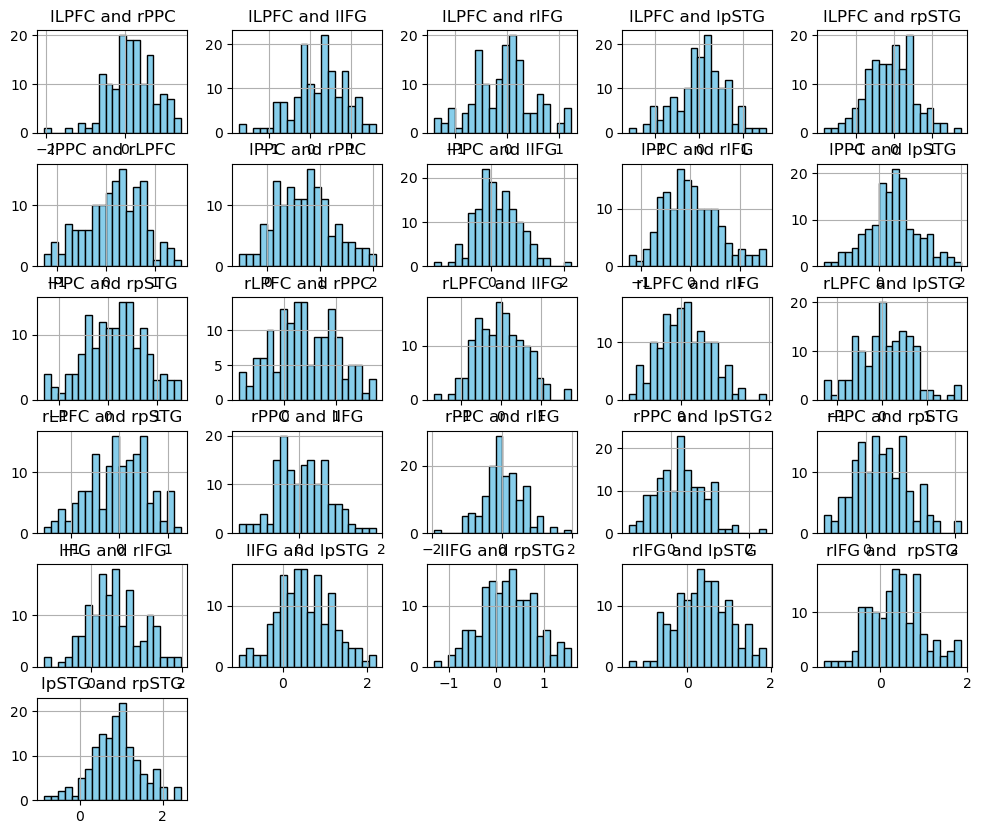

In [14]:
features.hist(bins=20, figsize=(12,10), color = 'skyblue', edgecolor = 'black')
plt.show()

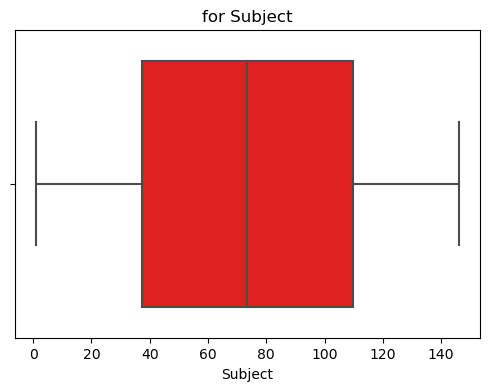

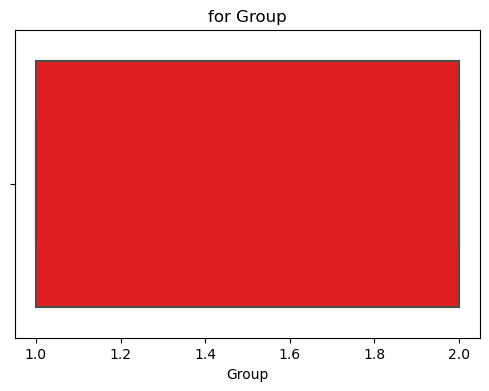

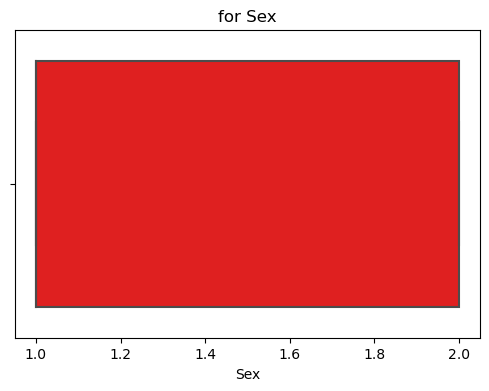

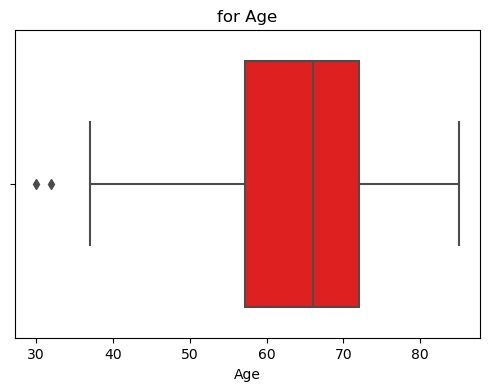

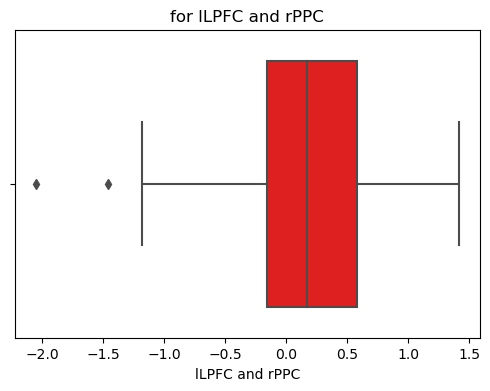

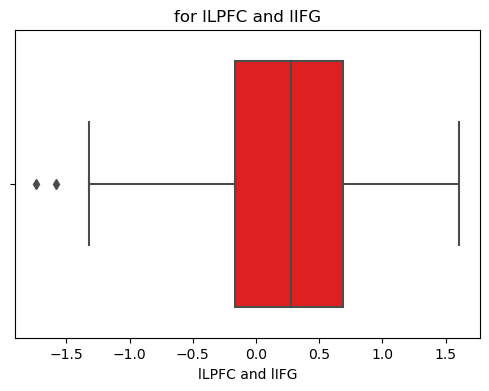

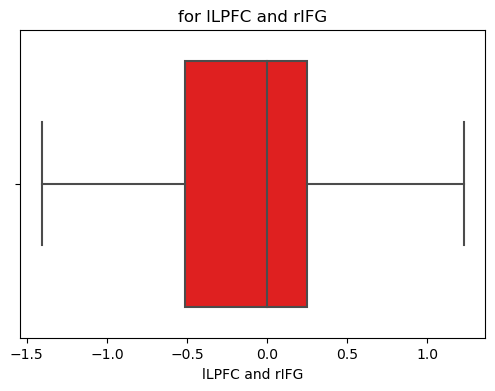

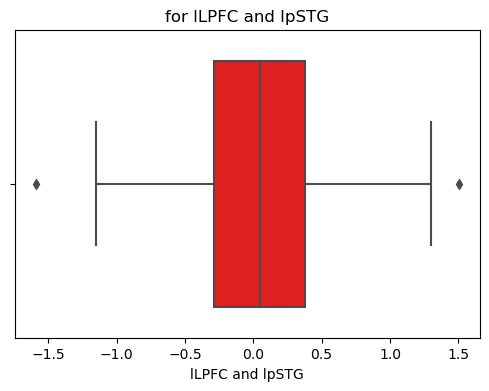

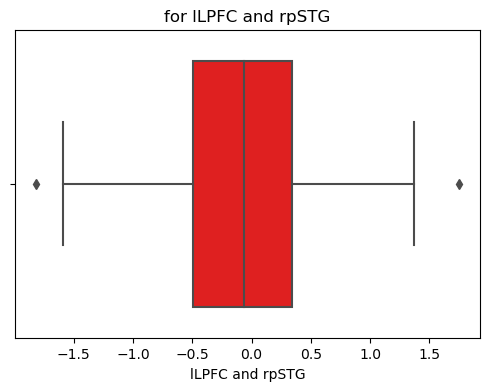

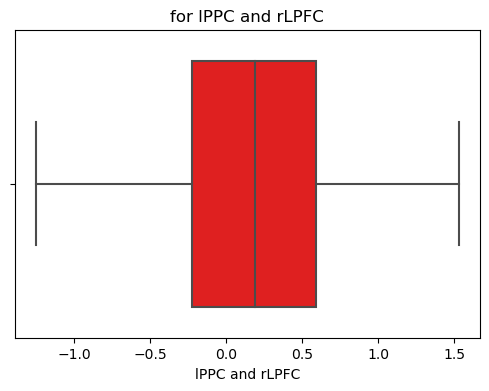

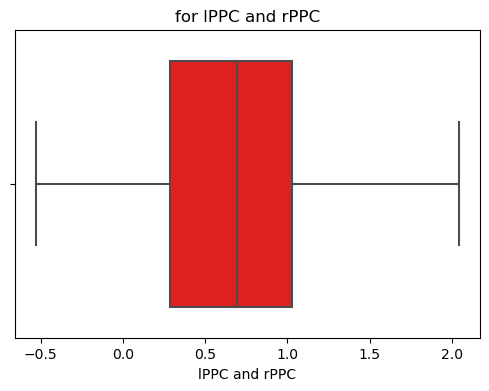

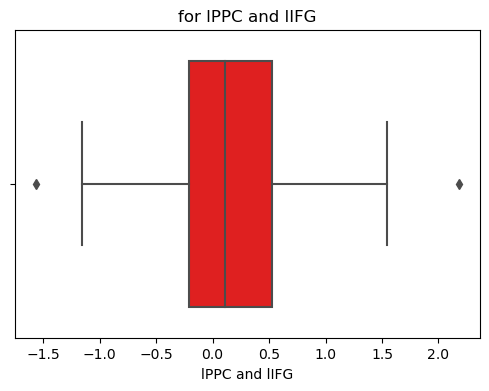

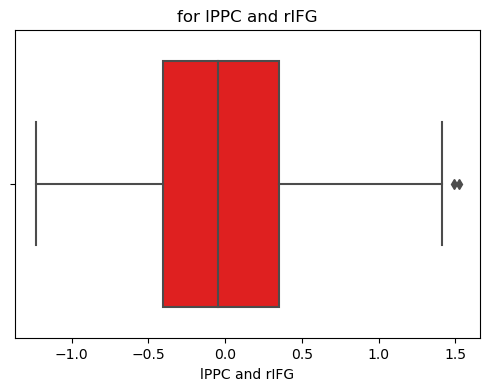

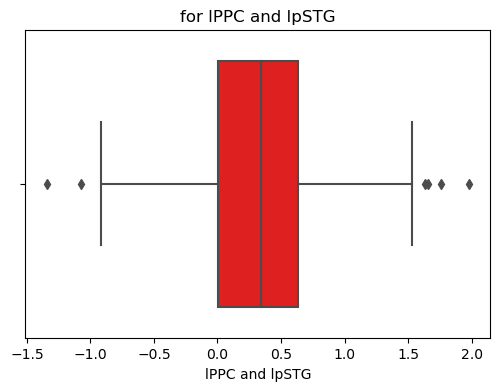

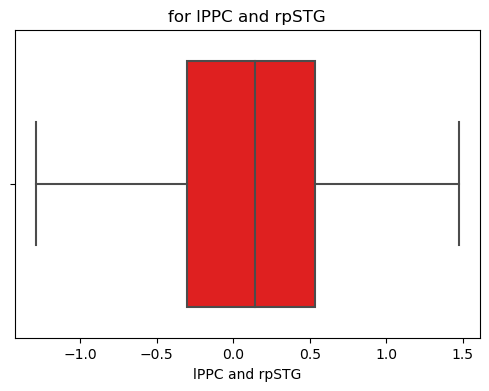

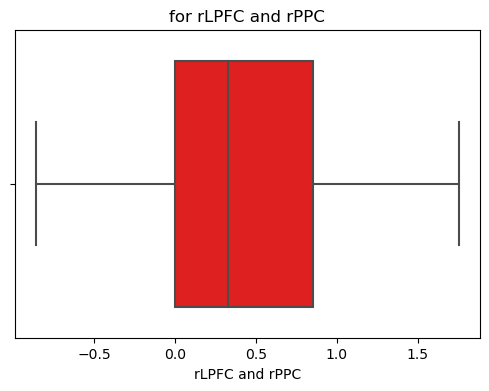

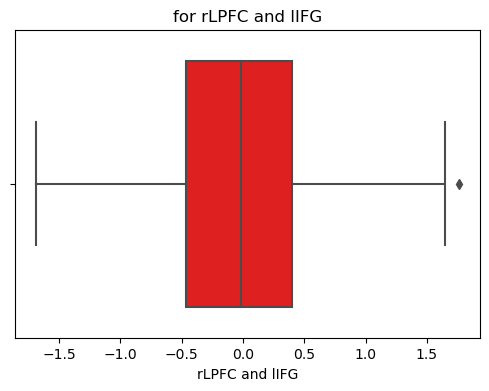

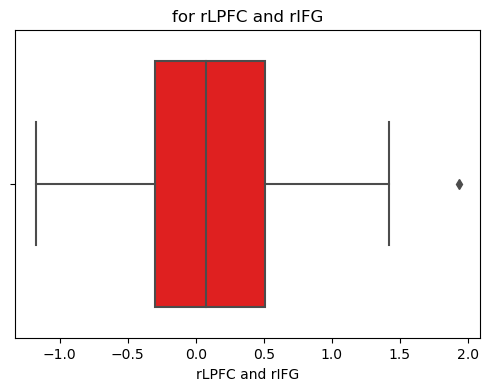

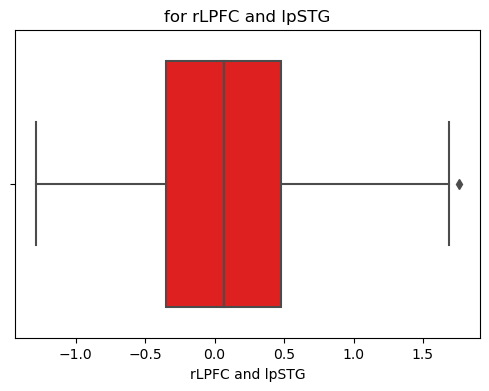

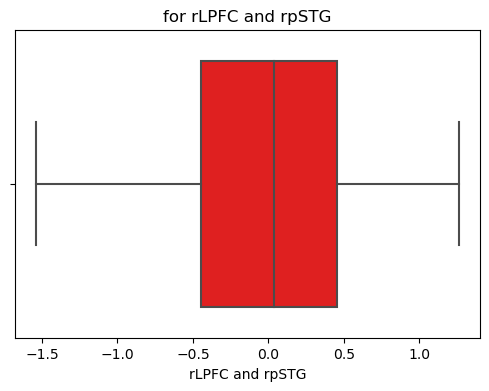

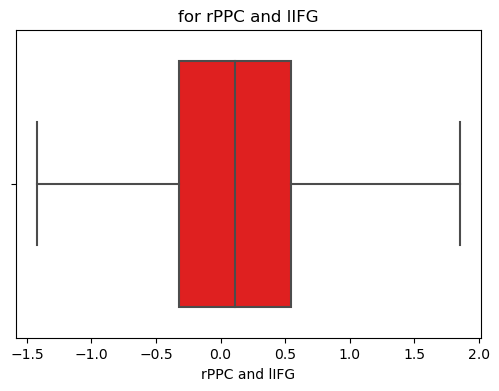

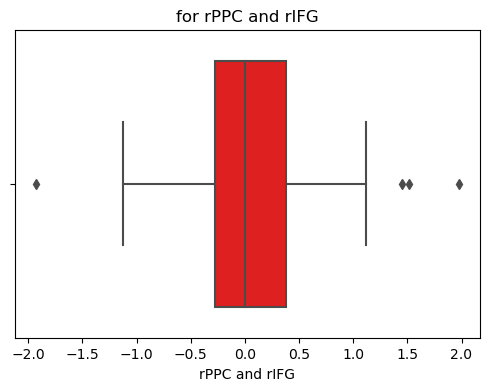

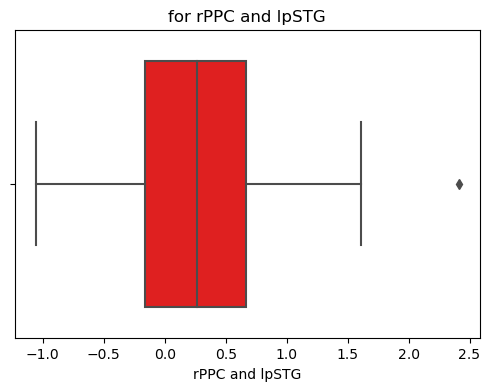

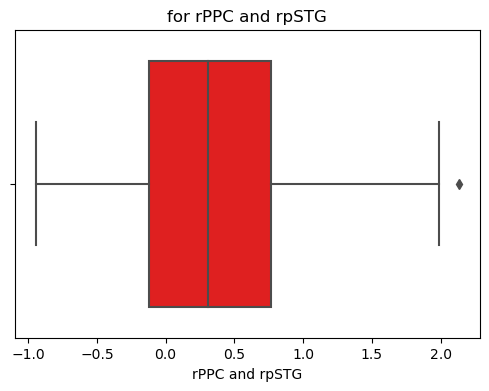

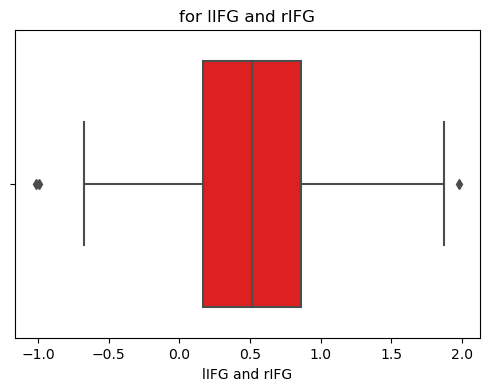

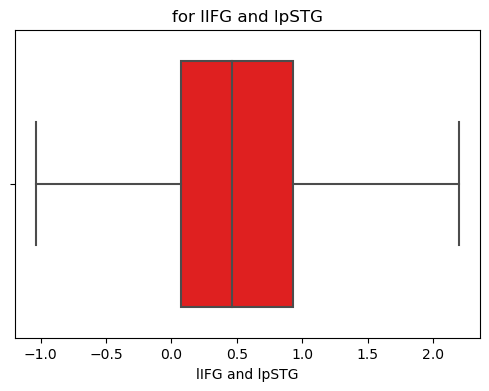

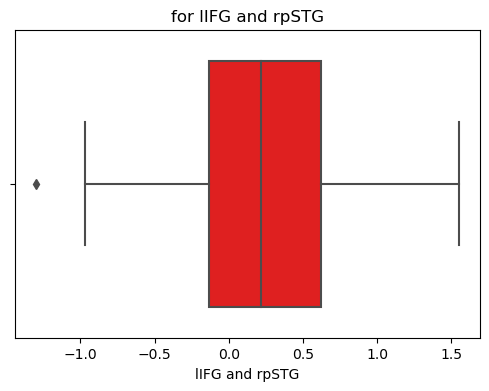

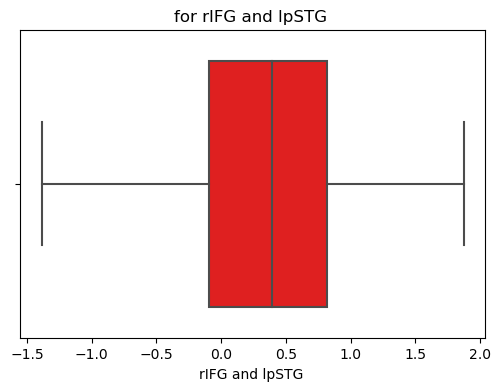

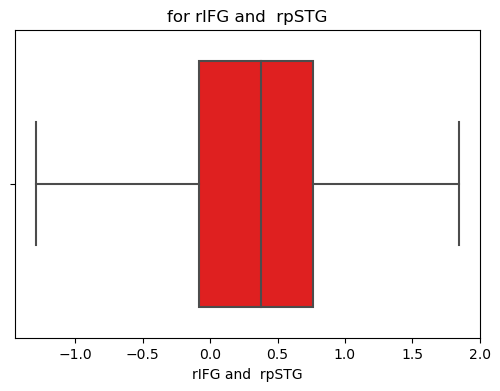

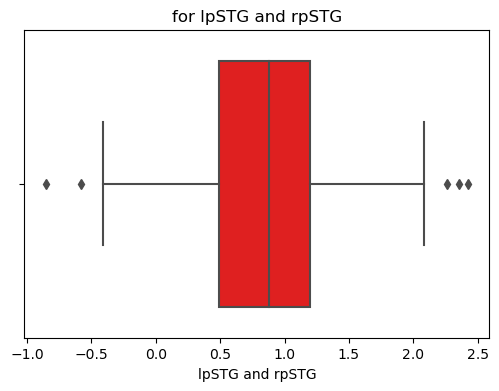

In [15]:
for feature in PPMI.columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = PPMI[feature], color ='red' )
    plt.title(f'for {feature}')
    plt.xlabel(feature)
    plt.show()

In [16]:
for feature in PPMI.columns:
    Q1= PPMI[feature].quantile(0.25)
    Q3= PPMI[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    PPMI[feature] = np.where(
        (PPMI[feature] < low_bound )| (PPMI[feature] > up_bound), 
        PPMI[feature].median(),
        PPMI[feature])

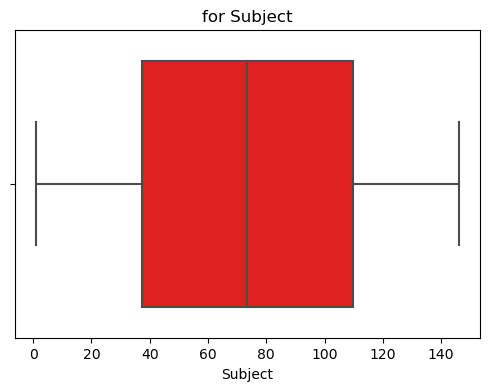

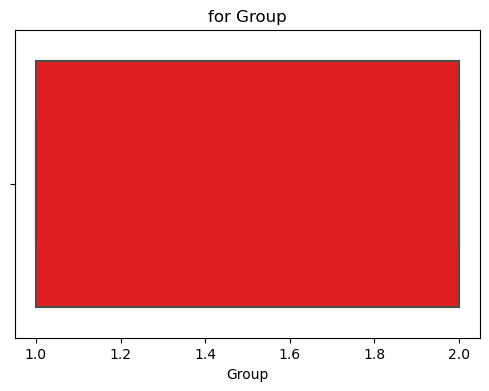

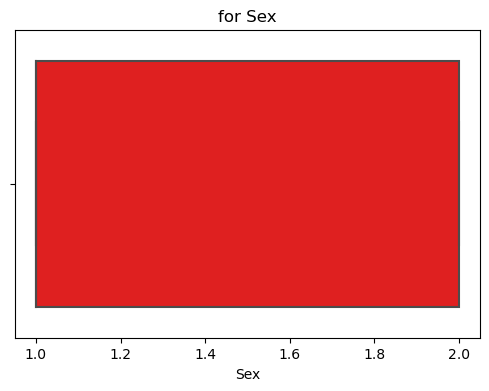

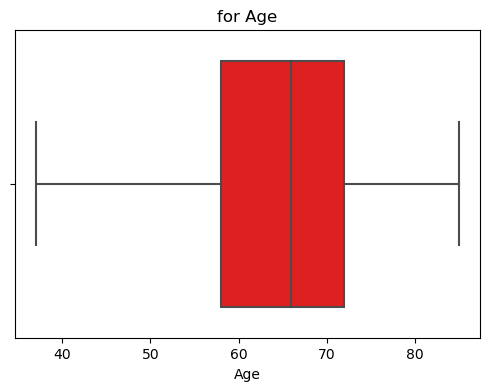

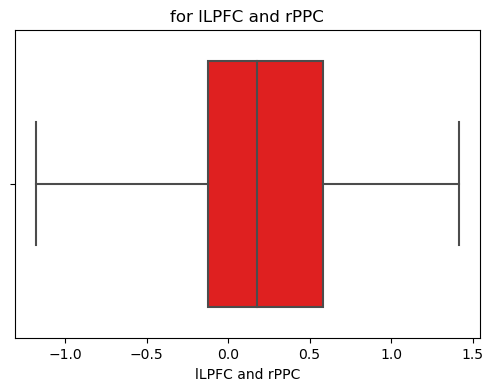

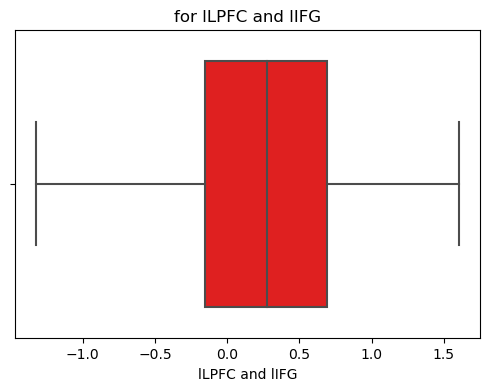

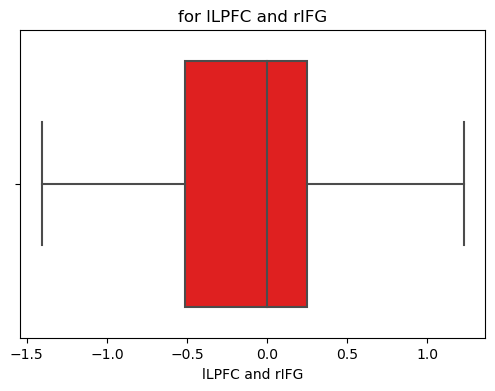

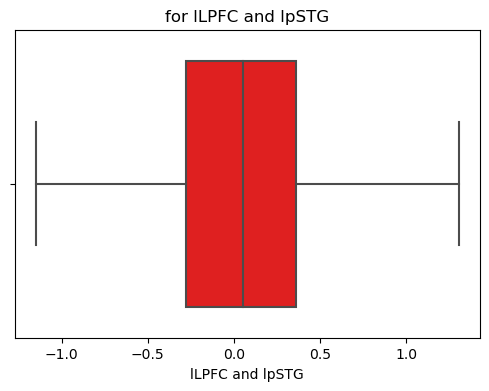

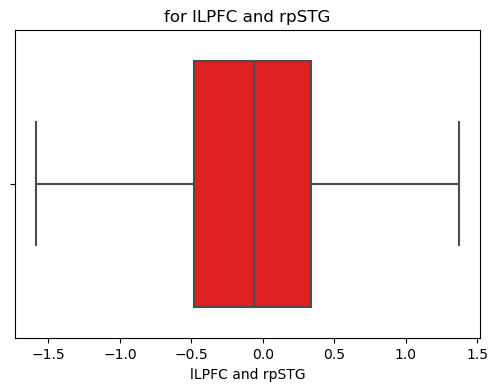

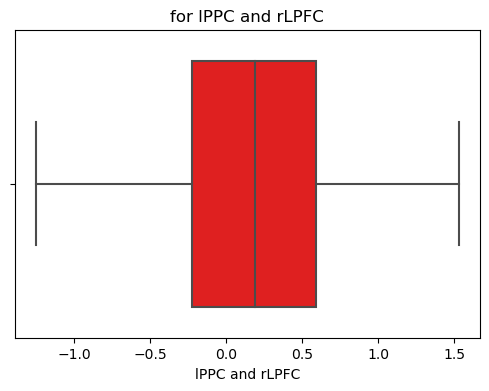

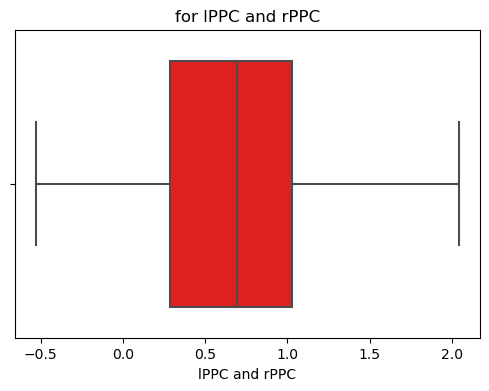

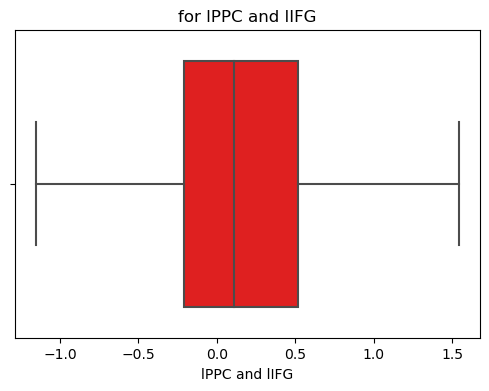

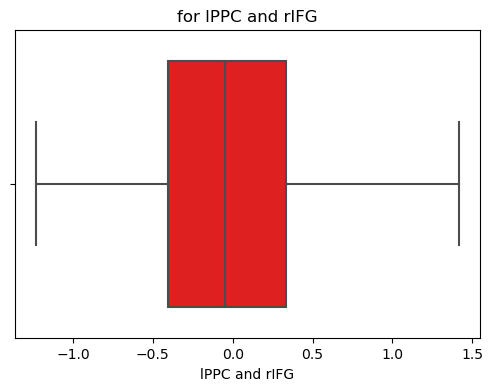

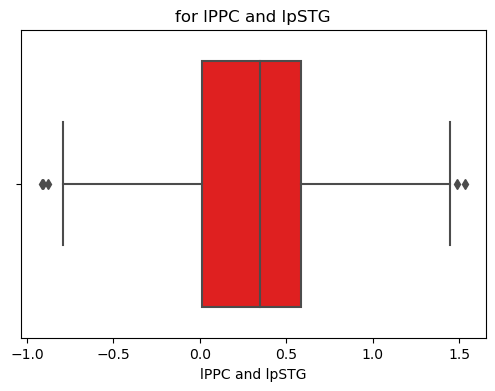

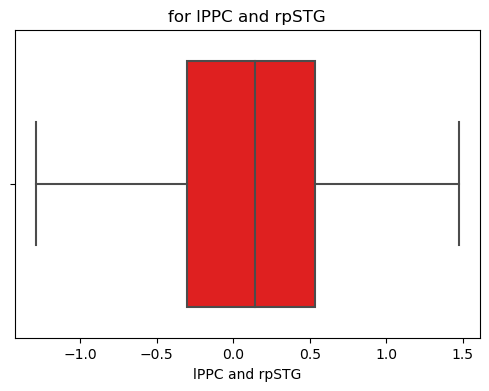

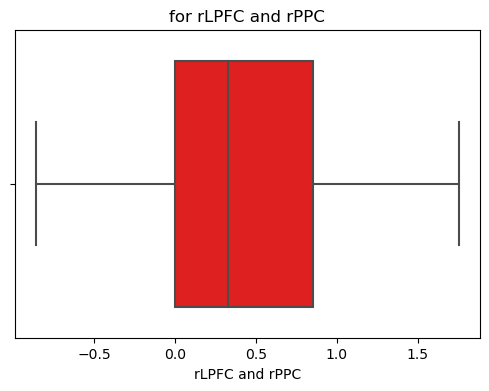

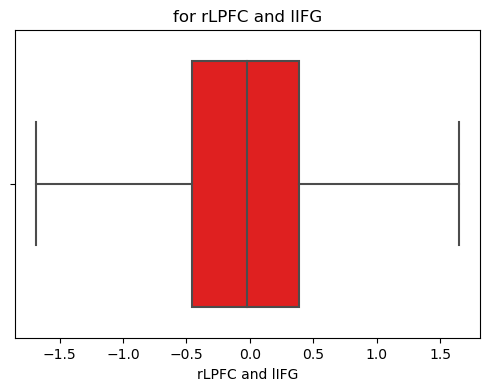

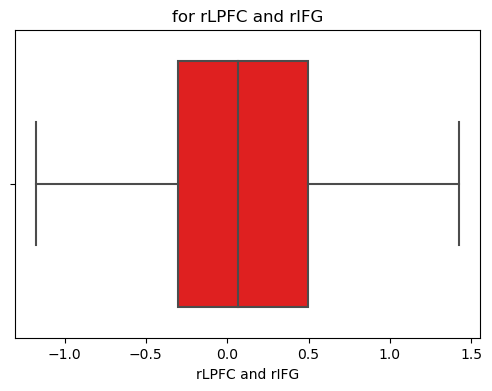

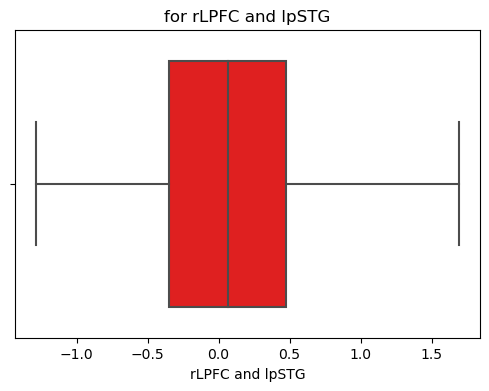

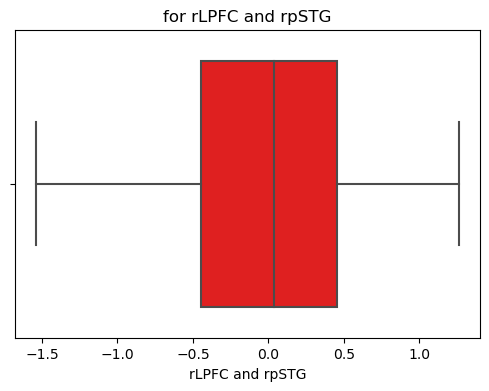

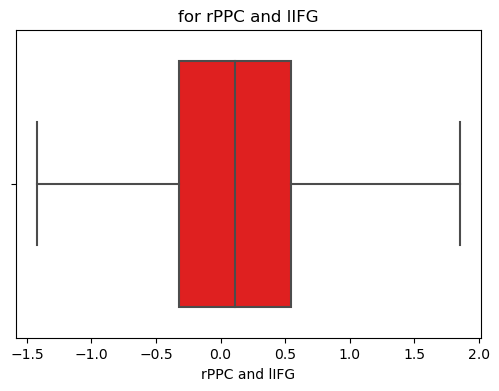

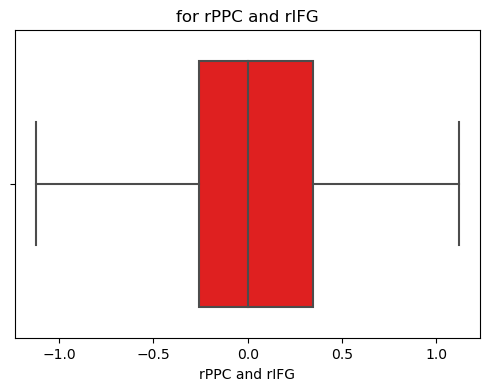

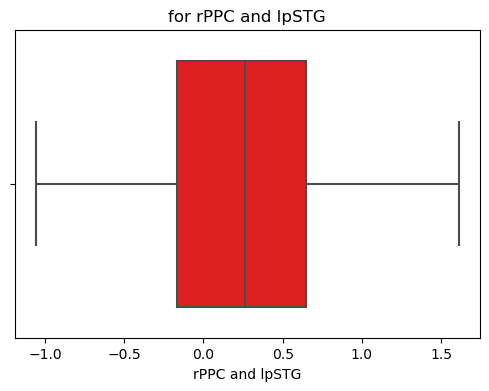

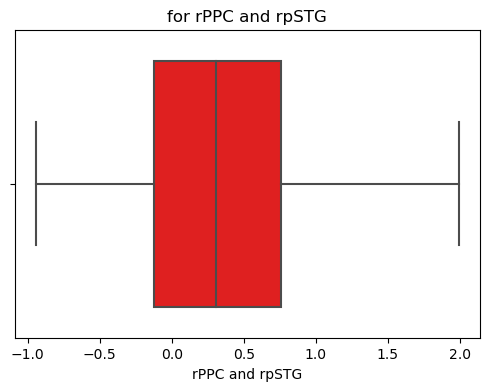

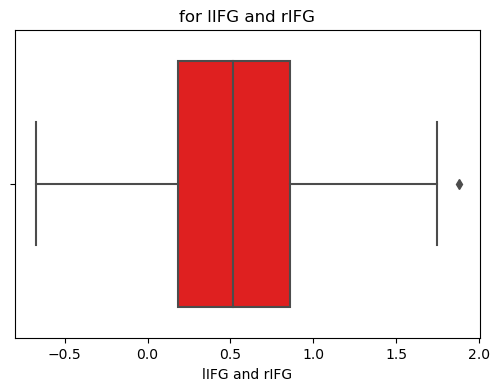

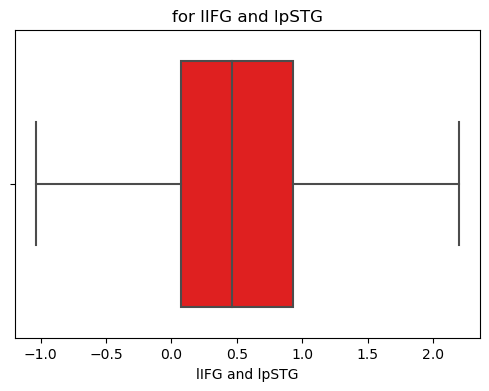

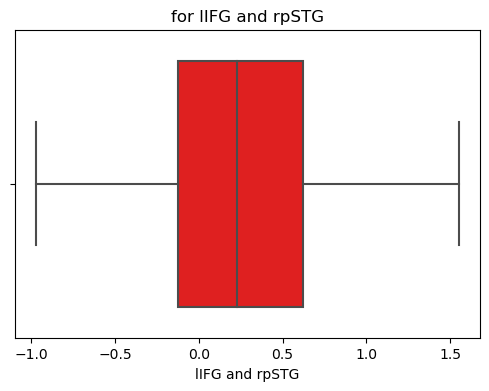

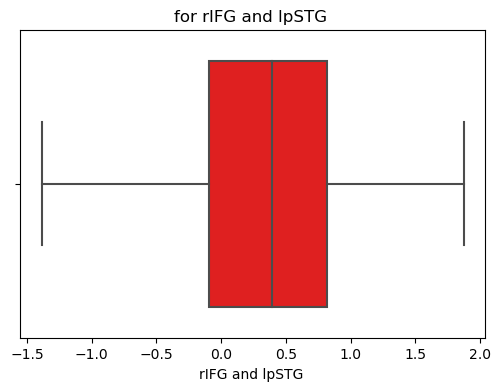

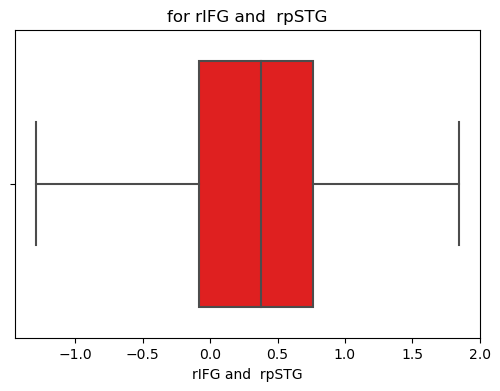

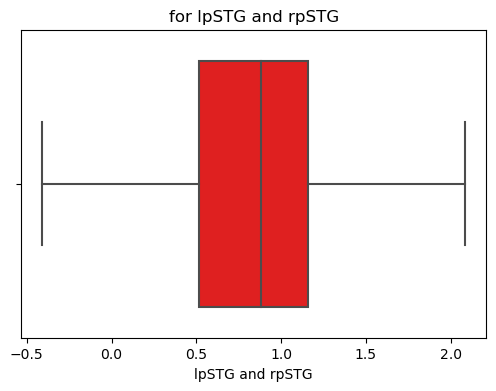

In [17]:
for feature in PPMI.columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = PPMI[feature], color ='red' )
    plt.title(f'for {feature}')
    plt.xlabel(feature)
    plt.show()

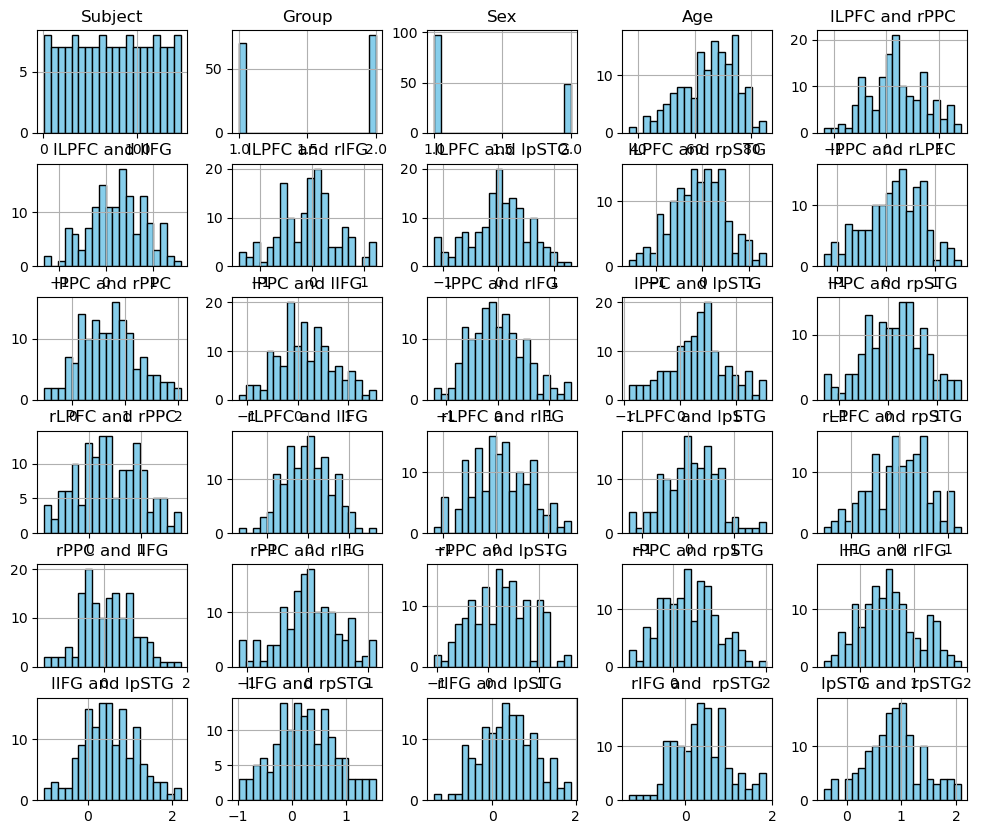

In [18]:
PPMI.hist(bins=20, figsize=(12,10), color = 'skyblue', edgecolor = 'black')
plt.show()

In [19]:
##z = np.abs(zscore(features))
##outlier_ind = np.where(z > 3)
##outlier_ind

In [20]:
stn = StandardScaler()
PPMI.iloc[: , 4: ] =  stn.fit_transform(PPMI.iloc[: , 4:])

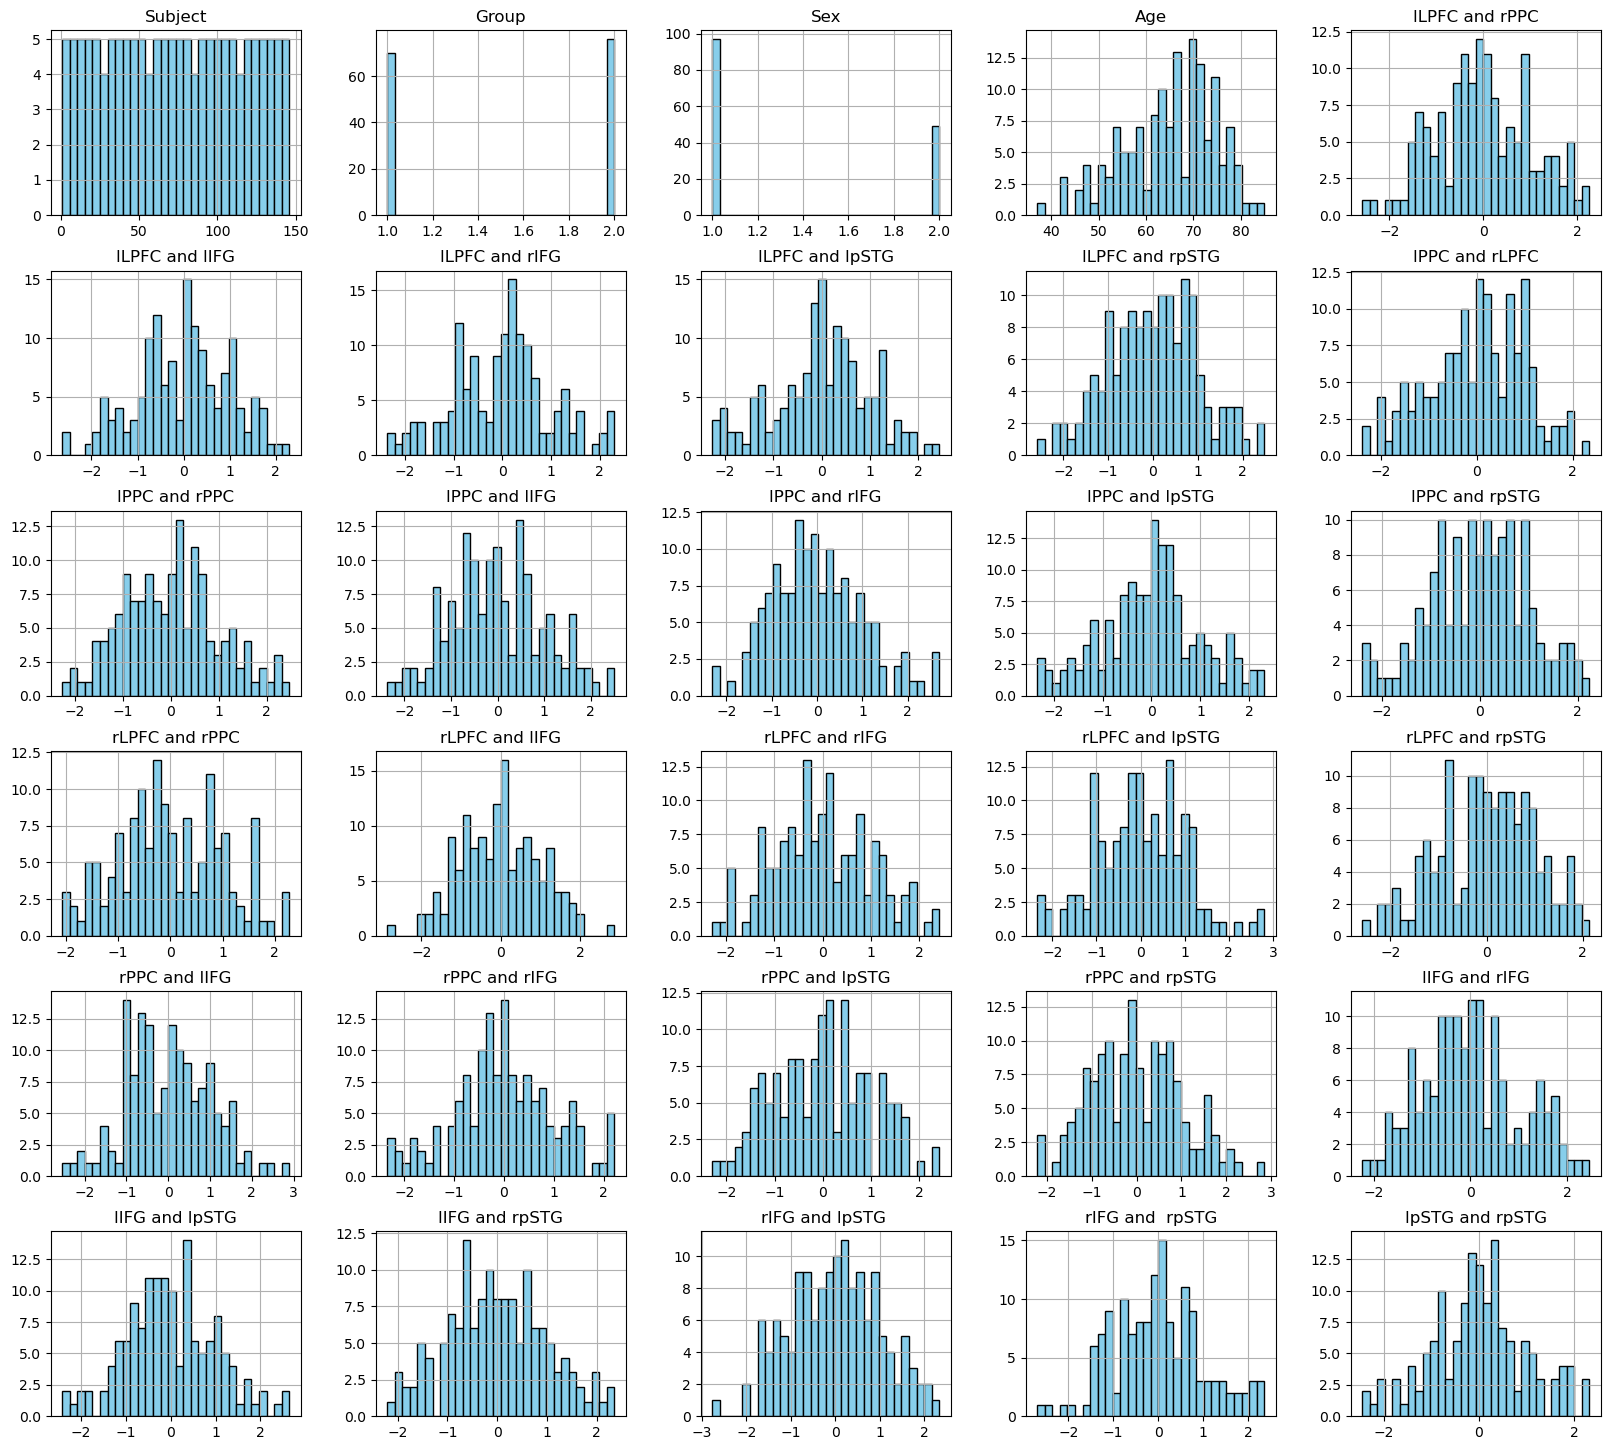

In [21]:
PPMI.hist(bins=30, figsize=(20,18), color = 'skyblue', edgecolor = 'black')
plt.show()

# well i hope its scaled rn.

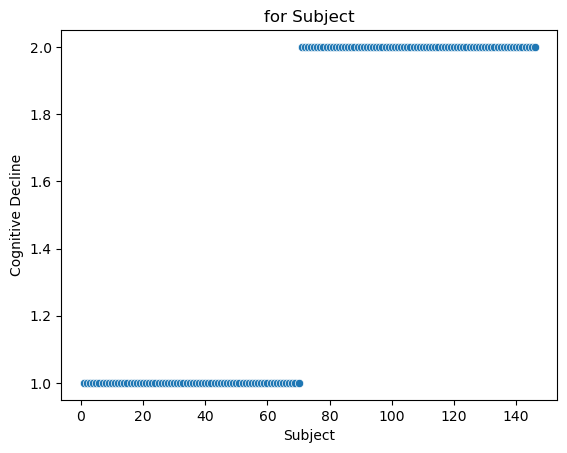

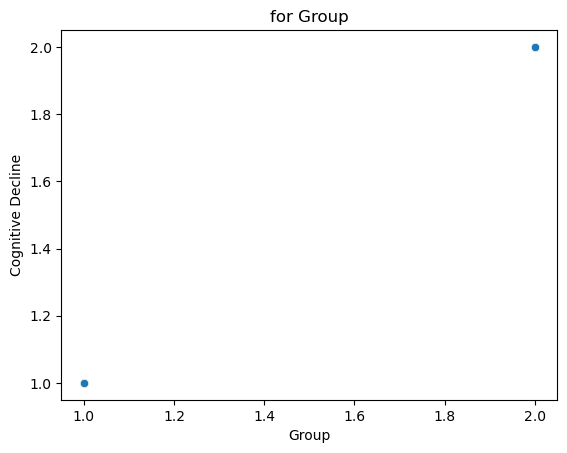

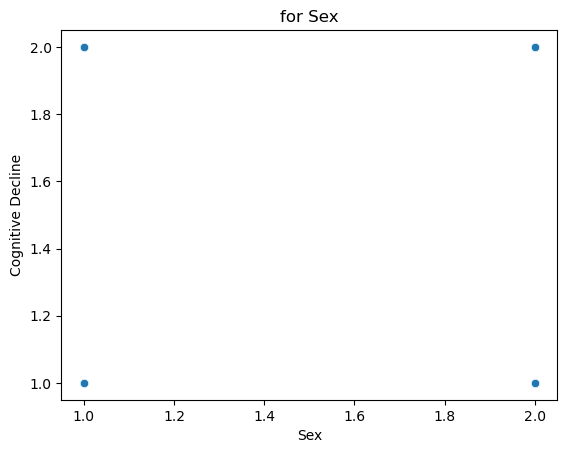

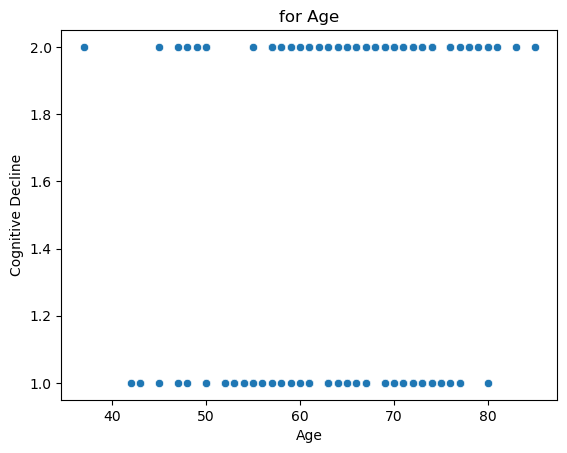

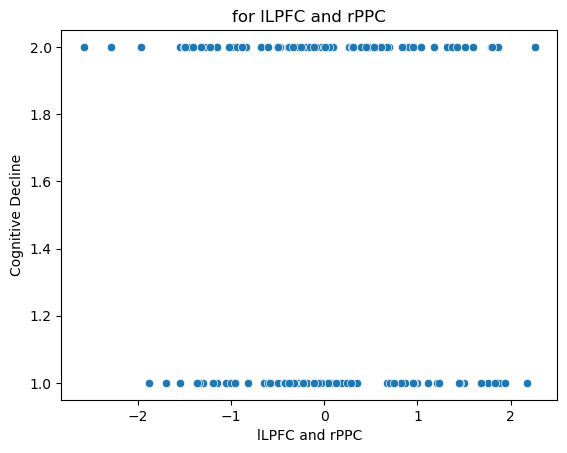

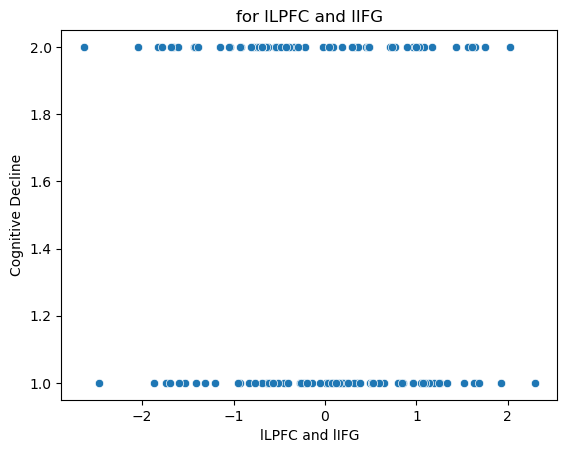

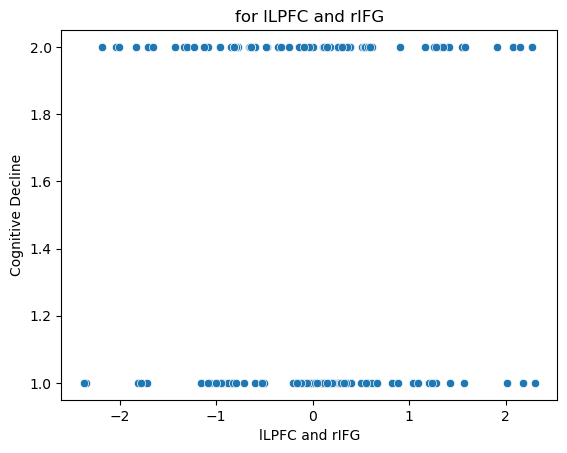

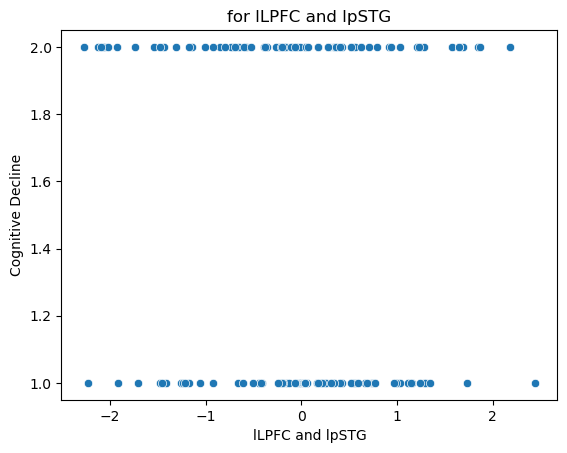

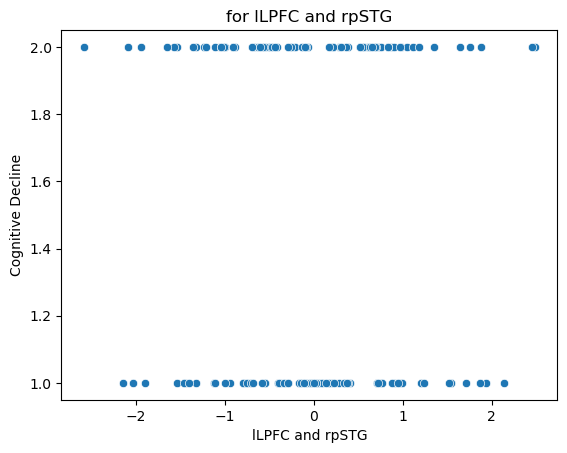

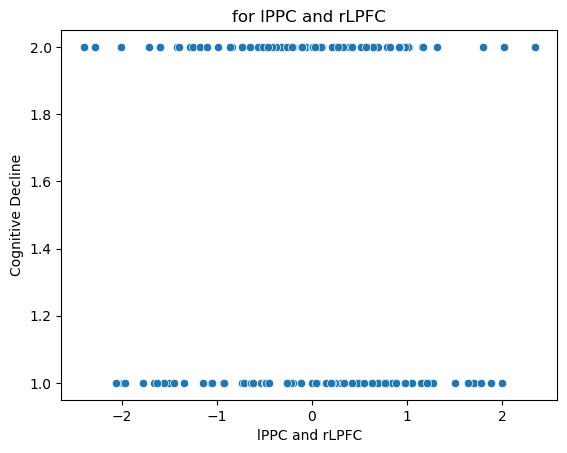

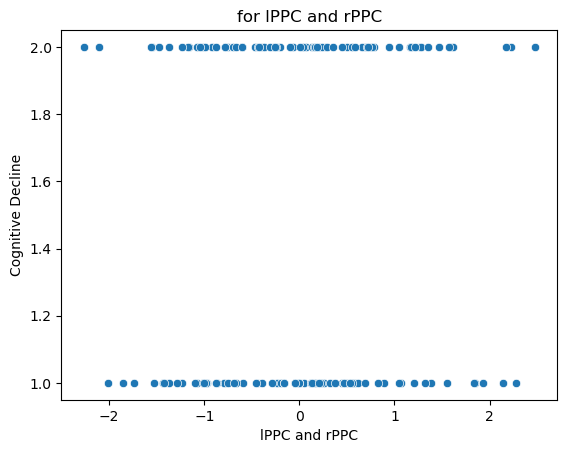

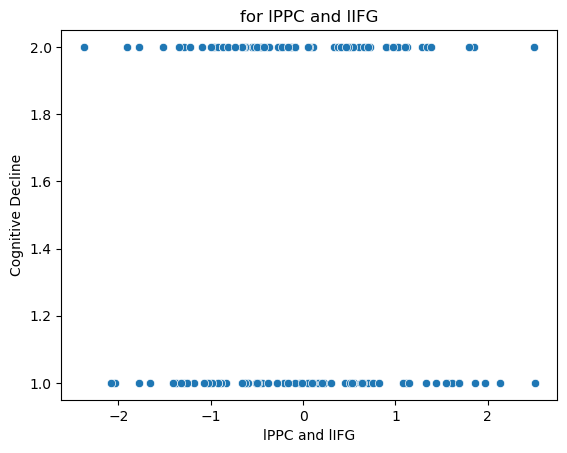

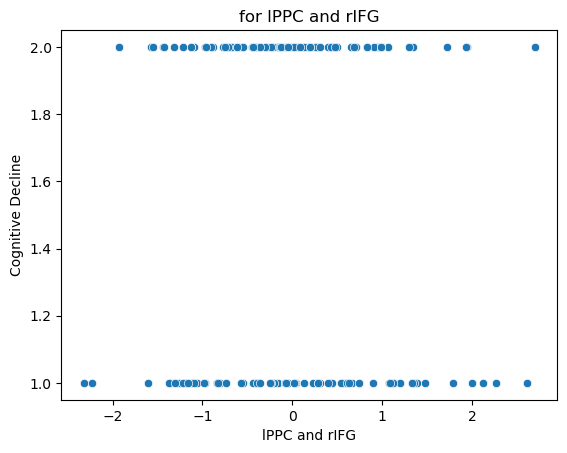

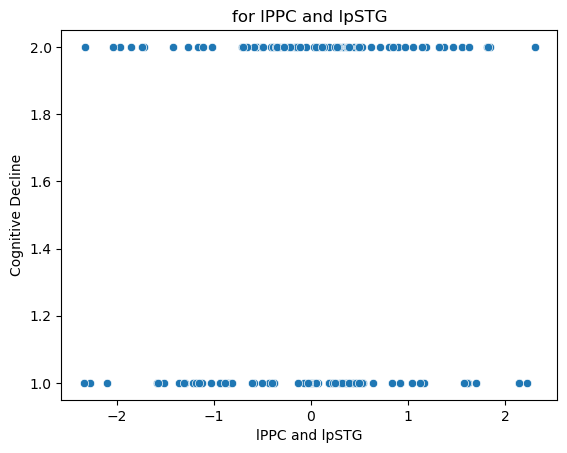

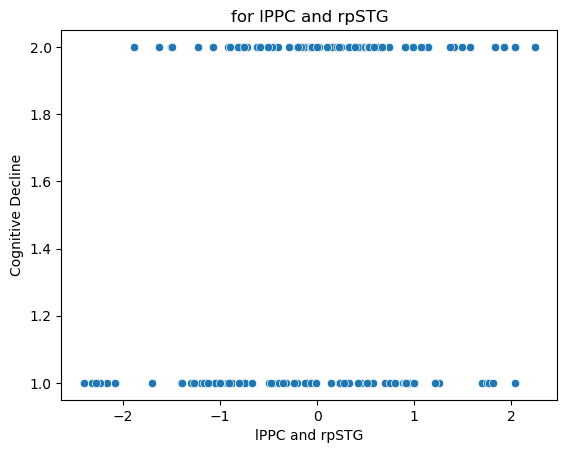

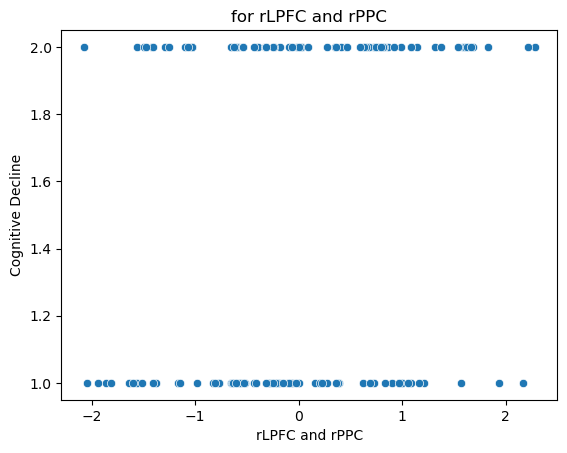

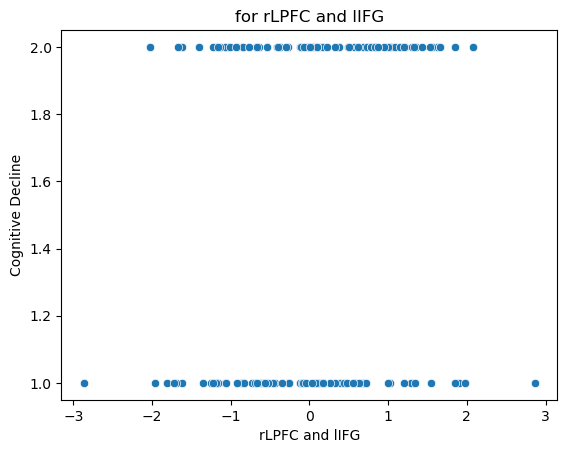

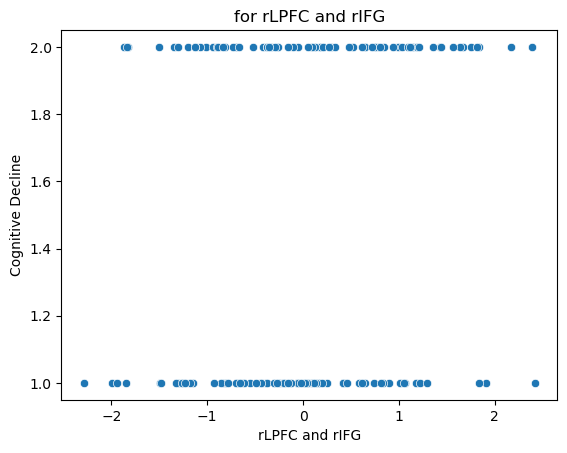

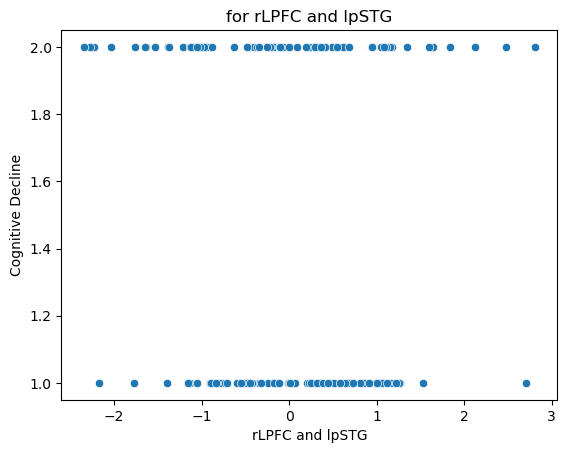

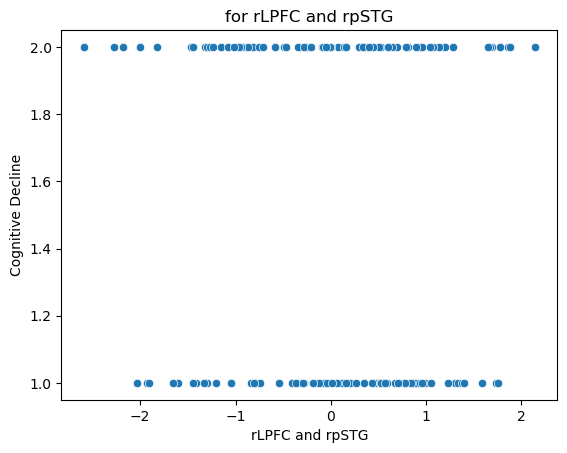

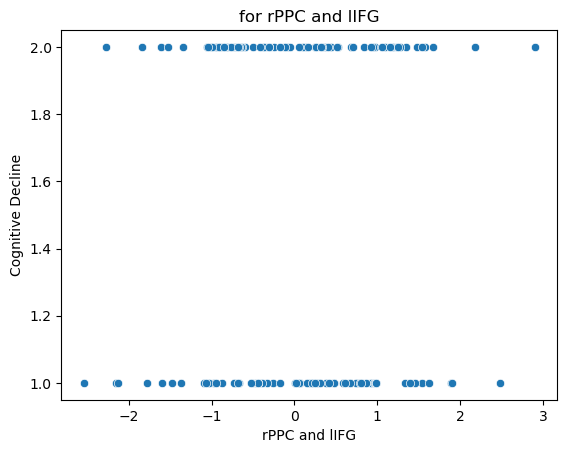

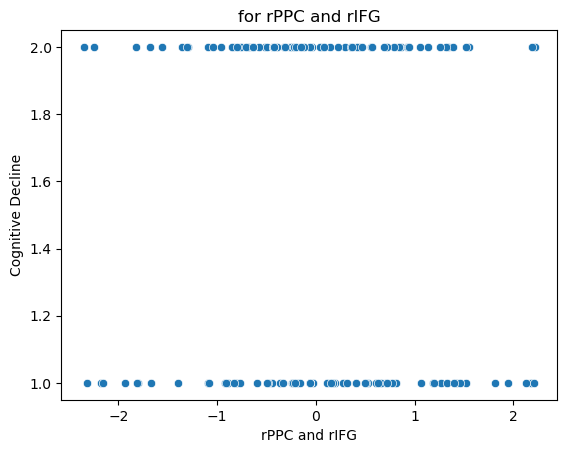

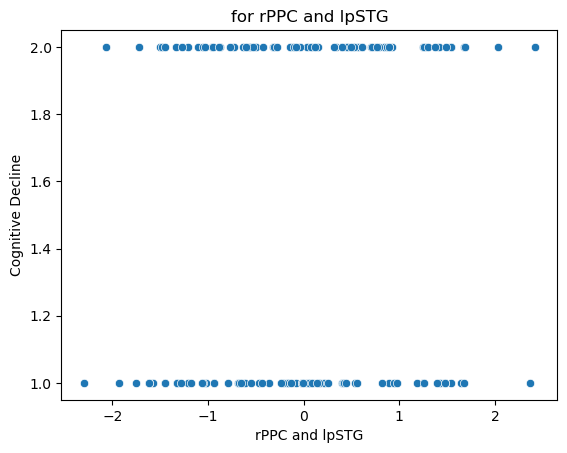

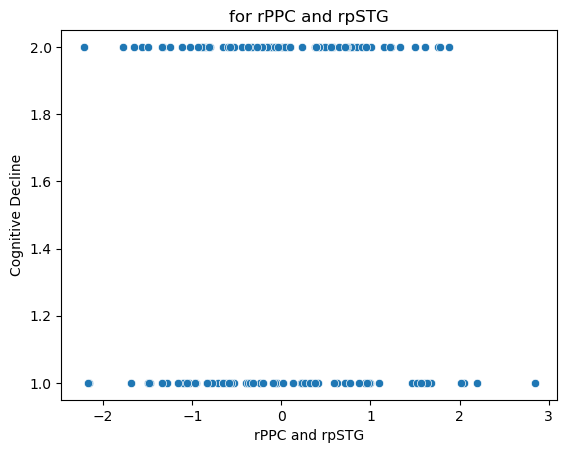

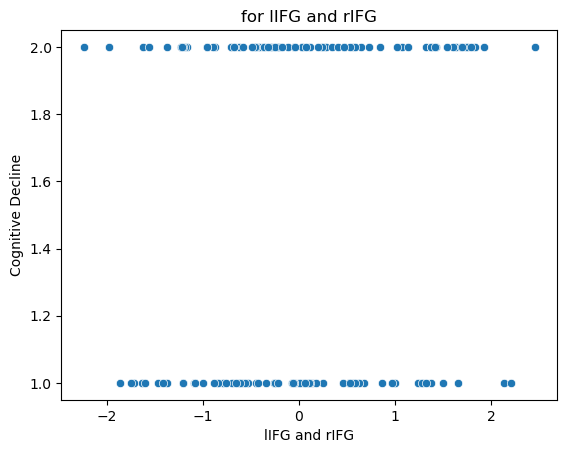

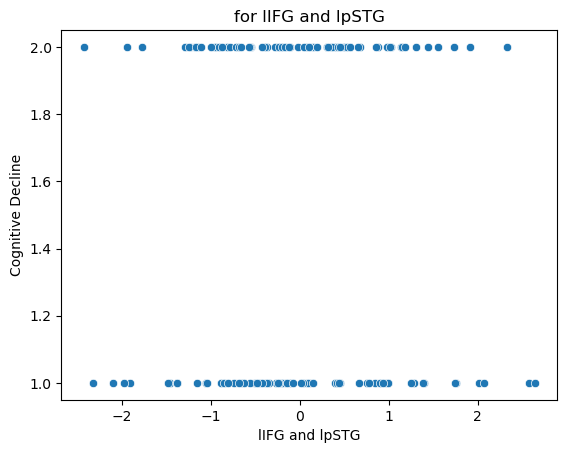

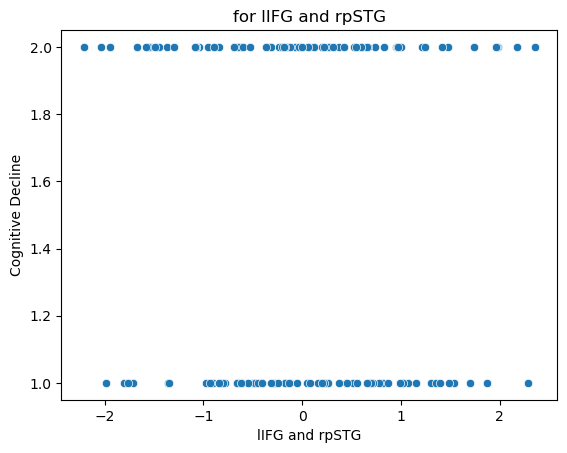

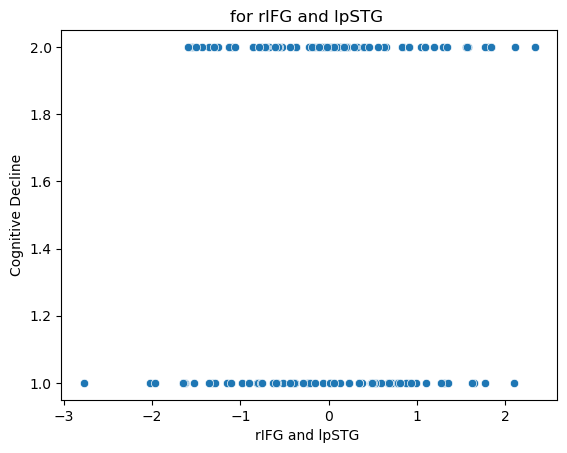

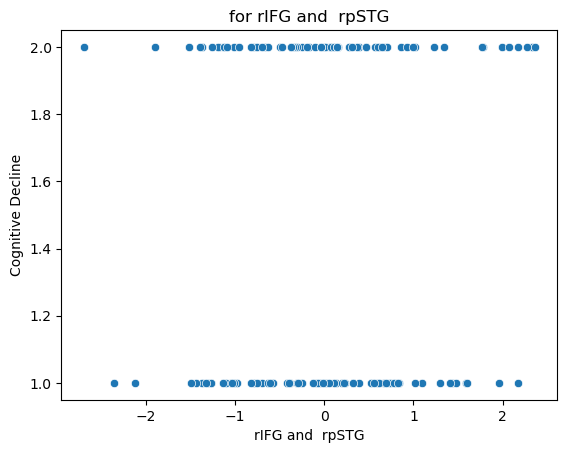

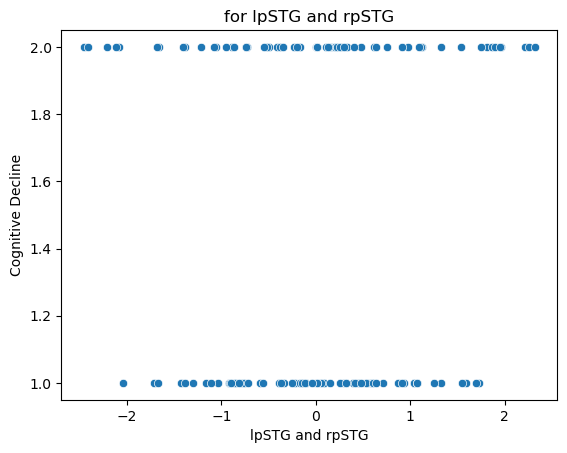

In [22]:
for feature in PPMI:
    sns.scatterplot(x= PPMI[feature] , y = PPMI.iloc[: , 1])
    plt.title(f'for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cognitive Decline')
    plt.show()

In [23]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
PPMI_reduced = selector.fit_transform(PPMI)
PPMI_reduced

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -9.82567534e-01, -5.92764630e-01,  4.24109896e-01],
       [ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -8.00378727e-01, -1.36707570e+00, -1.34793323e-01],
       [ 3.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         1.30653721e+00,  8.42201888e-01, -1.33924007e-01],
       ...,
       [ 1.44000000e+02,  2.00000000e+00,  1.00000000e+00, ...,
         1.83657848e+00,  1.34230373e+00,  1.95565370e+00],
       [ 1.45000000e+02,  2.00000000e+00,  2.00000000e+00, ...,
         2.11388979e+00,  2.07352013e+00,  6.37640320e-01],
       [ 1.46000000e+02,  2.00000000e+00,  2.00000000e+00, ...,
        -1.61081285e-02, -3.23249999e-02, -1.40408425e+00]])

In [24]:
# Separate metadata and features
metadata_cols = ['Subject', 'Group', 'Sex', 'Age']
features = PPMI.drop(metadata_cols, axis=1)
metadata = PPMI[metadata_cols]

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit(features)

# Get selected feature names
selected_features = features.columns[selector.get_support()]

# Create new DataFrame with selected features
df_selected = pd.concat([metadata, features[selected_features]], axis=1)

print("Selected features:", selected_features.tolist())
print("\nSelected DataFrame:")
print(df_selected.head())

Selected features: ['lLPFC and rPPC', 'lLPFC and lIFG', 'lLPFC and rIFG', 'lLPFC and lpSTG', 'lLPFC and rpSTG', 'lPPC and rLPFC', 'lPPC and rPPC', 'lPPC and lIFG', 'lPPC and rIFG', 'lPPC and lpSTG', 'lPPC and rpSTG', 'rLPFC and rPPC', 'rLPFC and lIFG', 'rLPFC and rIFG', 'rLPFC and lpSTG', 'rLPFC and rpSTG', 'rPPC and lIFG', 'rPPC and rIFG', 'rPPC and lpSTG', 'rPPC and rpSTG', 'lIFG and rIFG', 'lIFG and lpSTG', 'lIFG and rpSTG', 'rIFG and lpSTG ', 'rIFG and  rpSTG', 'lpSTG and rpSTG']

Selected DataFrame:
   Subject  Group  Sex   Age  lLPFC and rPPC  lLPFC and lIFG  lLPFC and rIFG  \
0      1.0    1.0  1.0  71.0       -0.572957        0.183640        0.820822   
1      2.0    1.0  1.0  75.0        0.219596        0.241544       -1.721111   
2      3.0    1.0  2.0  54.0       -0.492421        0.181154       -0.081854   
3      4.0    1.0  1.0  67.0       -0.063392        1.523084       -0.123101   
4      5.0    1.0  2.0  61.0       -0.184407        0.352172        0.346709   

   lLPFC 

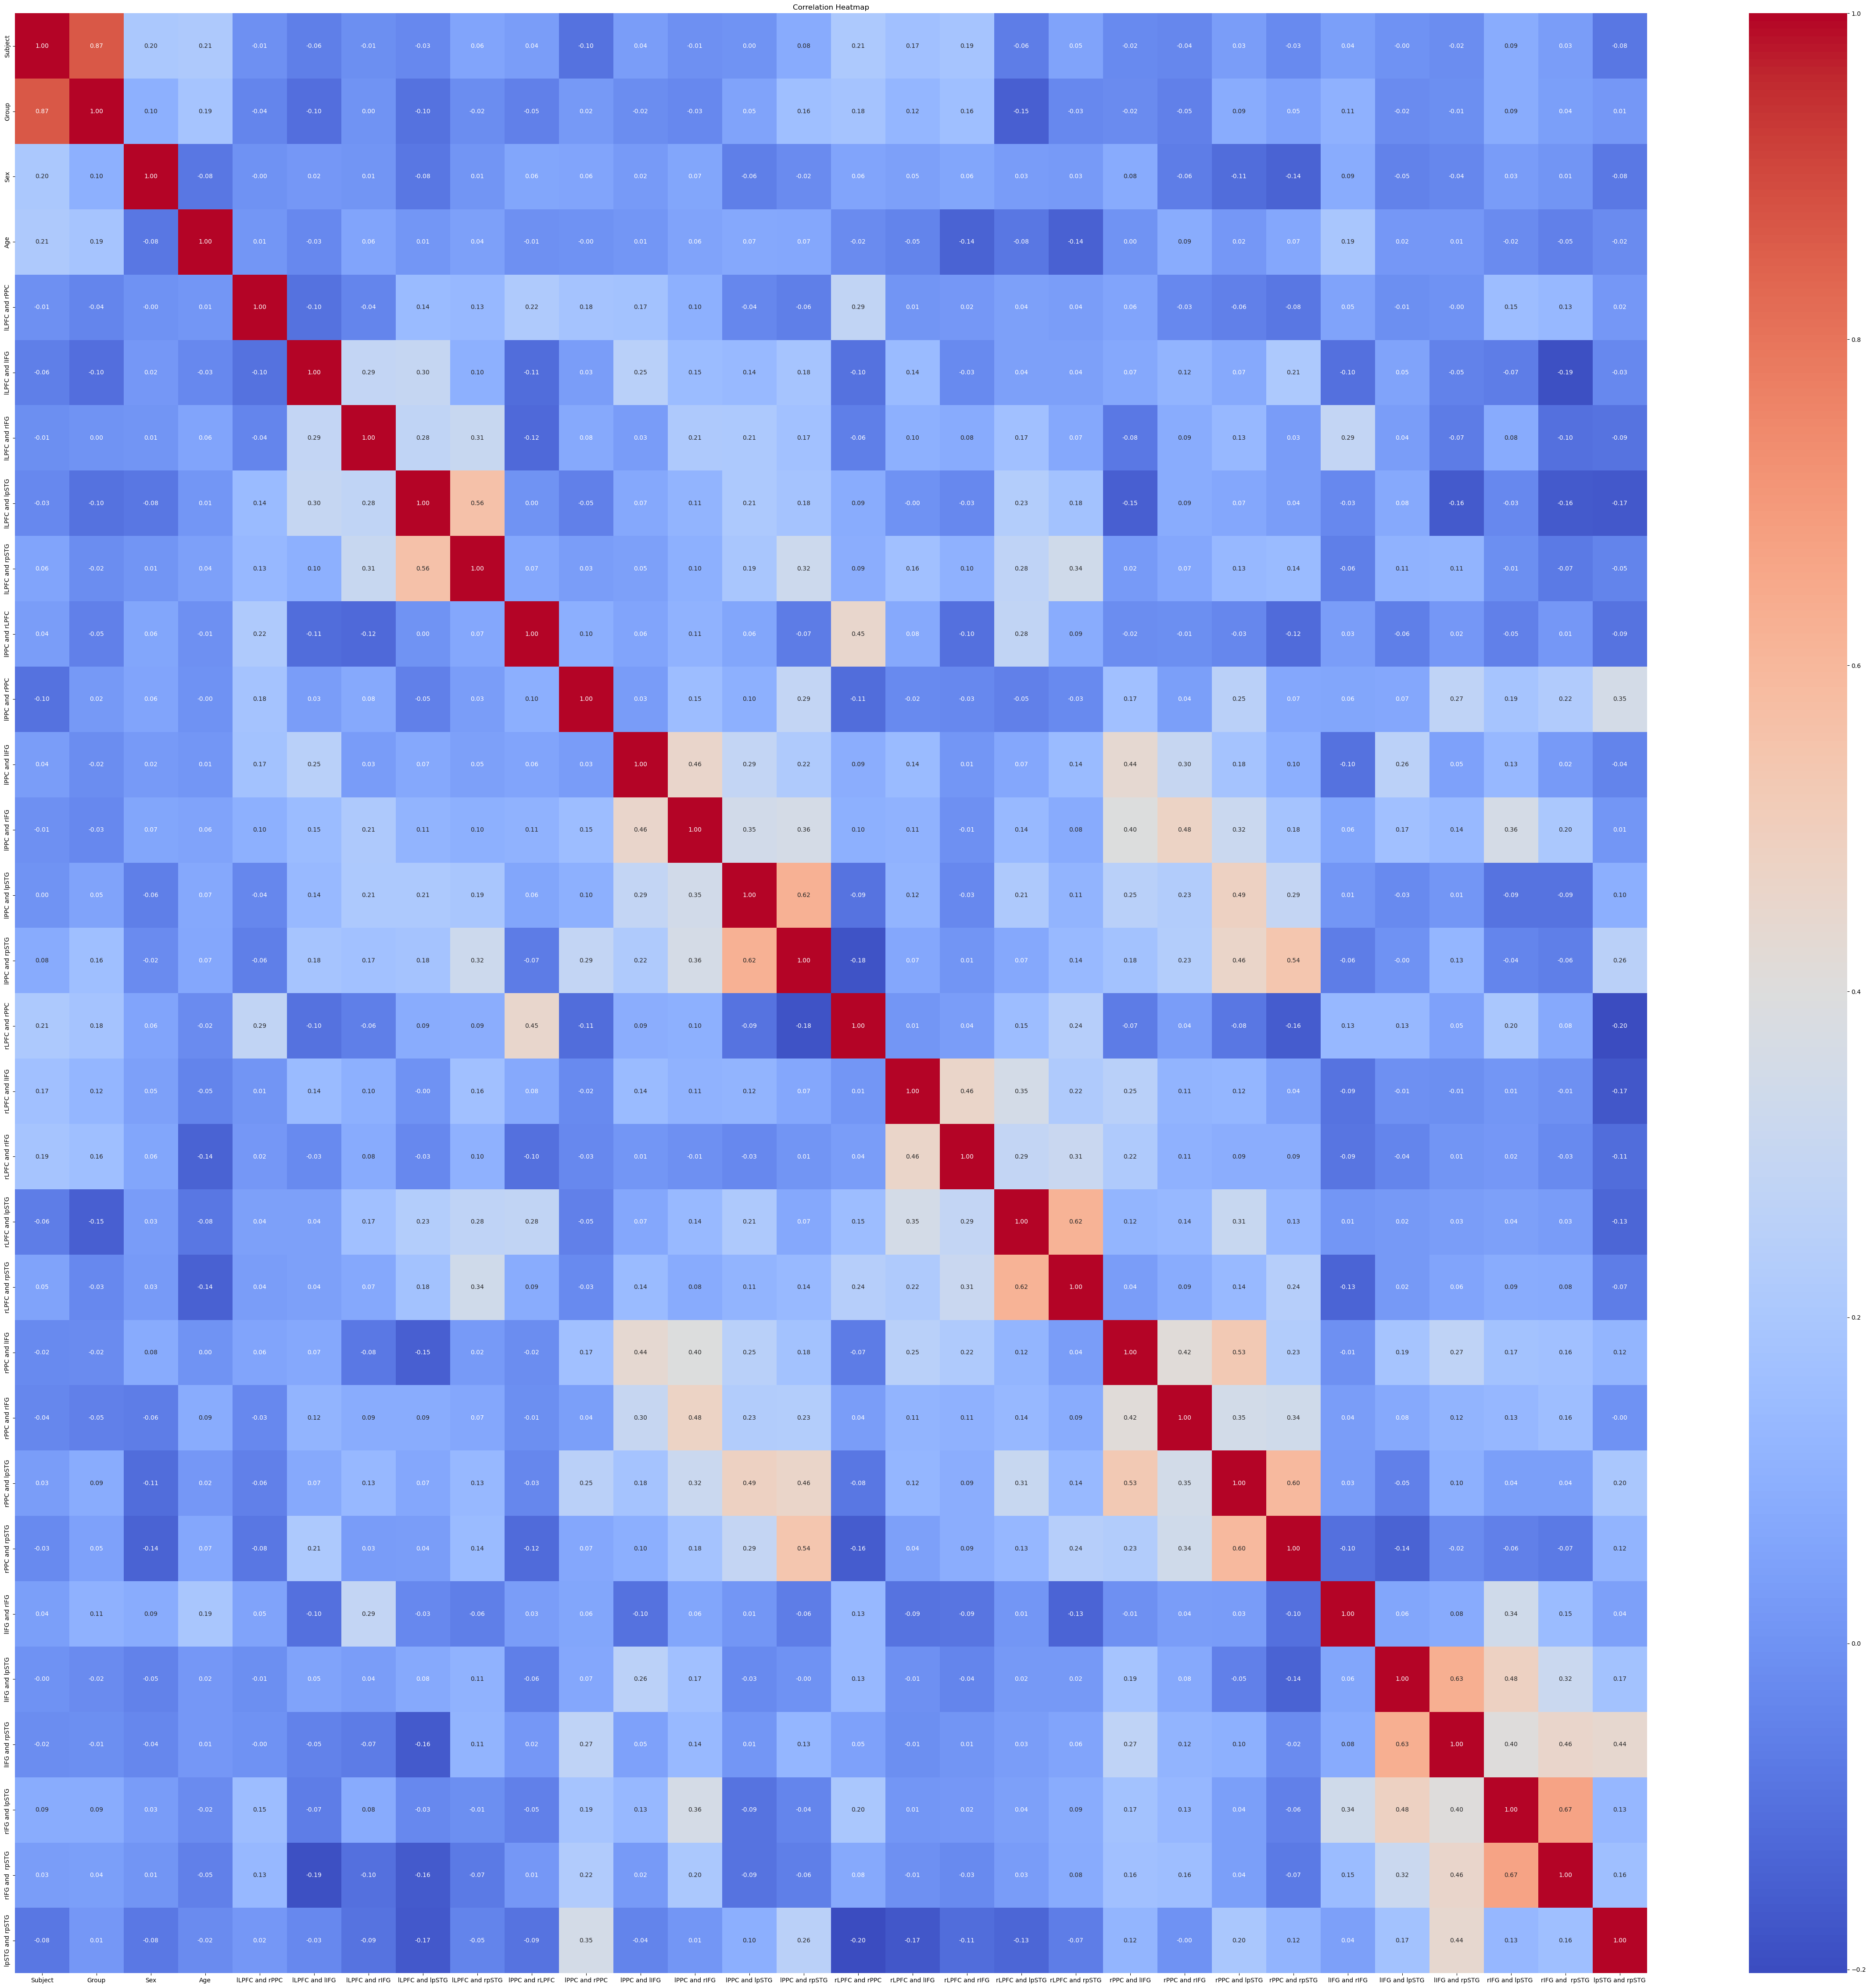

In [25]:
correlation_matrix = PPMI.corr()

plt.figure(figsize=(60, 58))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
correlation_matrix

Subject     Group       Sex       Age  lLPFC and rPPC  \
Subject          1.000000  0.865314  0.202540  0.213135       -0.007050   
Group            0.865314  1.000000  0.101422  0.185248       -0.040609   
Sex              0.202540  0.101422  1.000000 -0.084312       -0.003436   
Age              0.213135  0.185248 -0.084312  1.000000        0.011001   
lLPFC and rPPC  -0.007050 -0.040609 -0.003436  0.011001        1.000000   
lLPFC and lIFG  -0.058333 -0.104889  0.018302 -0.029488       -0.097074   
lLPFC and rIFG  -0.012138  0.000562  0.007799  0.058919       -0.040038   
lLPFC and lpSTG -0.031653 -0.096410 -0.083131  0.012225        0.140630   
lLPFC and rpSTG  0.060409 -0.016354  0.007126  0.044219        0.134970   
lPPC and rLPFC   0.035410 -0.052816  0.062916 -0.008564        0.216808   
lPPC and rPPC   -0.096945  0.019502  0.060631 -0.000621        0.181338   
lPPC and lIFG    0.035884 -0.015242  0.024211  0.010970        0.174601   
lPPC and rIFG   -0.006590 -0.029069  0.065318  0.055814        0.098658   
lPPC and lpSTG   0.000914  0.052287 -0.060256  0.072575       -0.035907   
lPPC and rpSTG   0.082162  0.160763 -0.022232  0.068789       -0.059753   
rLPFC and rPPC   0.209831  0.180647  0.056217 -0.020582        0.285289   
rLPFC and lIFG   0.165328  0.123308  0.045442 -0.046510        0.005202   
rLPFC and rIFG   0.185559  0.163840  0.062956 -0.139664        0.015049   
rLPFC and lpSTG -0.061803 -0.148050  0.030191 -0.081200        0.042101   
rLPFC and rpSTG  0.052692 -0.032195  0.025571 -0.141912        0.036089   
rPPC and lIFG   -0.024956 -0.022114  0.082672  0.001127        0.056718   
rPPC and rIFG   -0.037553 -0.052396 -0.062070  0.087951       -0.031796   
rPPC and lpSTG   0.034546  0.088123 -0.108662  0.015046       -0.056289   
rPPC and rpSTG  -0.028090  0.048021 -0.139893  0.069870       -0.084816   
lIFG and rIFG    0.037798  0.106886  0.086442  0.192960        0.054051   
lIFG and lpSTG  -0.003990 -0.021105 -0.048837  0.016827       -0.012957   
lIFG and rpSTG  -0.016948 -0.010614 -0.035175  0.014844       -0.002835   
rIFG and lpSTG   0.085569  0.085921  0.028301 -0.021306        0.151832   
rIFG and  rpSTG  0.032816  0.037501  0.007619 -0.052112        0.134779   
lpSTG and rpSTG -0.080731  0.014222 -0.079925 -0.023163        0.017413   

                 lLPFC and lIFG  lLPFC and rIFG  lLPFC and lpSTG  \
Subject               -0.058333       -0.012138        -0.031653   
Group                 -0.104889        0.000562        -0.096410   
Sex                    0.018302        0.007799        -0.083131   
Age                   -0.029488        0.058919         0.012225   
lLPFC and rPPC        -0.097074       -0.040038         0.140630   
lLPFC and lIFG         1.000000        0.288142         0.299062   
lLPFC and rIFG         0.288142        1.000000         0.278238   
lLPFC and lpSTG        0.299062        0.278238         1.000000   
lLPFC and rpSTG        0.100222        0.307723         0.560710   
lPPC and rLPFC        -0.109533       -0.121297         0.001025   
lPPC and rPPC          0.033848        0.075205        -0.052349   
lPPC and lIFG          0.252411        0.028472         0.071726   
lPPC and rIFG          0.149318        0.213234         0.112743   
lPPC and lpSTG         0.136818        0.206889         0.210198   
lPPC and rpSTG         0.184260        0.171957         0.178899   
rLPFC and rPPC        -0.098856       -0.058078         0.087139   
rLPFC and lIFG         0.144156        0.100232        -0.004073   
rLPFC and rIFG        -0.026825        0.083425        -0.032636   
rLPFC and lpSTG        0.044169        0.166987         0.232185   
rLPFC and rpSTG        0.044013        0.070242         0.177597   
rPPC and lIFG          0.071812       -0.076812        -0.149490   
rPPC and rIFG          0.115653        0.085321         0.086103   
rPPC and lpSTG         0.074968        0.133273         0.067219   
rPPC and rpSTG         0.207656        0.032293         0.03

In [27]:
threshold = 0.15

# Report the names of rows where the value for column 'Age' is above the threshold
rows_above_threshold = correlation_matrix[correlation_matrix['Group'] > threshold].index

print("Rows with 'Age' value above", threshold, ":", list(rows_above_threshold))


Rows with 'Age' value above 0.15 : ['Subject', 'Group', 'Age', 'lPPC and rpSTG', 'rLPFC and rPPC', 'rLPFC and rIFG']


as i dont really get how variance frature selection worrks, ive chosen feature with corr above 0.15

# setting to test and train

In [28]:
#question: do we conduct feature selection on whole data or only test data?

In [29]:
selected_features = ['Age', 'lPPC and rpSTG', 'rLPFC and rPPC', 'rLPFC and rIFG']
X = PPMI[selected_features]
y = PPMI['Group']

In [30]:
X,y

(      Age  lPPC and rpSTG  rLPFC and rPPC  rLPFC and rIFG
 0    71.0        1.257968       -1.566596       -0.830047
 1    75.0        0.540407       -0.982513        0.253525
 2    54.0       -0.450006       -0.410548       -0.387167
 3    67.0        1.256083       -1.935685       -1.851401
 4    61.0       -1.197367        0.616745       -0.067565
 ..    ...             ...             ...             ...
 141  65.0       -1.222975        0.792557       -0.160046
 142  66.0        0.098173       -0.250692        1.834380
 143  72.0        1.140732       -0.534828        1.810617
 144  66.0       -1.880615       -0.314013       -0.666846
 145  49.0        1.070933        0.361779        0.049478
 
 [146 rows x 4 columns],
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 141    2.0
 142    2.0
 143    2.0
 144    2.0
 145    2.0
 Name: Group, Length: 146, dtype: float64)

In [31]:
X_train , X_test, y_train , y_test =  train_test_split(X,y, test_size = 0.2, random_state = 6)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_train = model.predict(X_train)

In [34]:
model.coef_


array([0.01480744, 0.06154565, 0.09069398, 0.08885765])

In [35]:
model.intercept_

0.5933371292469445

In [36]:
mse = mean_squared_error(y_train , y_pred_train)
mse

0.21159787018771511

In [37]:
r2 = r2_score(y_train , y_pred_train)
r2

0.1444528421737098

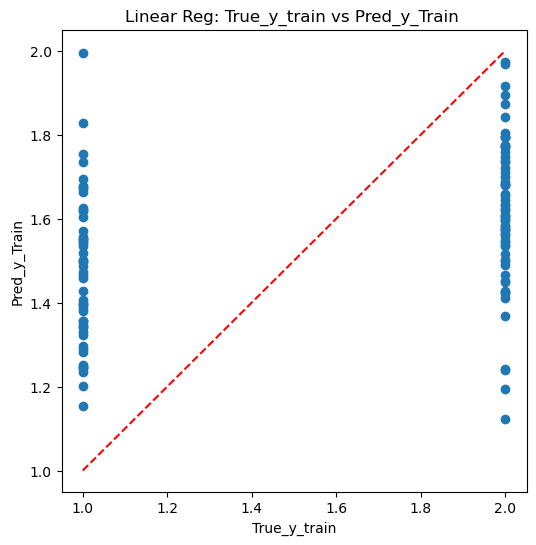

In [38]:
plt.figure(figsize = (6,6))
plt.scatter(y_train , y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--' )
plt.title('Linear Reg: True_y_train vs Pred_y_Train ')
plt.xlabel('True_y_train')
plt.ylabel('Pred_y_Train')
plt.show()

# ABIDE

In [26]:
abide = pd.read_csv('E:\\ML in neuro\\ses3\\abide2.tsv', sep='\t')

In [27]:
abide

site  subject        age  age_resid  sex  group  \
0      ABIDEII-KKI_1    29293   8.893151  13.642852  2.0    1.0   
1     ABIDEII-OHSU_1    28997  12.000000  16.081732  2.0    1.0   
2       ABIDEII-GU_1    28845   8.390000  12.866264  1.0    2.0   
3      ABIDEII-NYU_1    29210   8.300000  13.698139  1.0    1.0   
4      ABIDEII-EMC_1    29894   7.772758  14.772459  2.0    2.0   
...              ...      ...        ...        ...  ...    ...   
999     ABIDEII-IU_1    29570  20.000000  10.644232  1.0    2.0   
1000   ABIDEII-NYU_1    29233  10.862000  16.260139  1.0    2.0   
1001  ABIDEII-SDSU_1    28862  11.200000  13.211420  1.0    2.0   
1002   ABIDEII-KKI_1    29312   9.789041  14.538742  2.0    2.0   
1003   ABIDEII-NYU_2    29164   6.194000  14.510107  1.0    1.0   

      fsArea_L_V1_ROI  fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  \
0              2750.0             306.0            354.0           2123.0   
1              2836.0             186.0            354.0           2261.0   
2              3394.0             223.0            373.0           2827.0   
3              3382.0             266.0            422.0           2686.0   
4              3080.0             161.0            346.0           2105.0   
...               ...               ...              ...              ...   
999            3321.0             290.0            381.0           2802.0   
1000           2860.0             162.0            456.0           2460.0   
1001           3377.0             177.0            497.0           2810.0   
1002           3322.0             297.0            426.0           2640.0   
1003           2649.0             140.0            307.0           2359.0   

      ...  fsCT_R_p47r_ROI  fsCT_R_TGv_ROI  fsCT_R_MBelt_ROI  \
0     ...            3.362           2.827             2.777   
1     ...            2.809           3.539             2.944   
2     ...            2.435           3.321             2.799   
3     ...            3.349           3.344             2.694   
4     ...            2.428           2.940             2.809   
...   ...              ...             ...               ...   
999   ...            2.553           3.502             2.955   
1000  ...            2.437           3.658             2.537   
1001  ...            2.770           3.422             2.925   
1002  ...            2.579           3.328             2.998   
1003  ...            3.287           3.170             2.494   

      fsCT_R_LBelt_ROI  fsCT_R_A4_ROI  fsCT_R_STSva_ROI  fsCT_R_TE1m_ROI  \
0                2.526          3.202             3.024            3.354   
1                2.769          3.530             3.079            3.282   
2                2.388          3.148             3.125            3.116   
3                3.030          3.258             2.774            3.383   
4                2.607          3.430             2.752            2.645   
...                ...            ...               ...              ...   
999              2.873          3.074             2.849            2.941   
1000             2.482          3.425             2.819            3.304   
1001             3.028          3.285             2.717            3.073   
1002             3.062          3.601             3.049            2.901   
1003             2.725          3.477             2.850            3.695   

      fsCT_R_PI_ROI  fsCT_R_a32pr_ROI  fsCT_R_p24_ROI  
0             2.629             2.699           3.179  
1             2.670             2.746           3.324  
2             2.891             2.940           3.232  
3             2.696             3.014           3.264  
4             3.111             3.219           4.128  
...             ...               ...             ...  
999           2.863             2.854           3.265  
1000          2.688             3.200           3.086  
1001          2.899             3.029           3.292  
1002          2.704             3.076       

In [28]:
# moving loc of age
abide.insert(6, 'temp', abide['age_resid'])
abide.drop('age_resid', axis=1, inplace=True)
abide.rename(columns={'temp': 'age_resid'}, inplace=True)

In [29]:
abide

site  subject        age  sex  group  age_resid  \
0      ABIDEII-KKI_1    29293   8.893151  2.0    1.0  13.642852   
1     ABIDEII-OHSU_1    28997  12.000000  2.0    1.0  16.081732   
2       ABIDEII-GU_1    28845   8.390000  1.0    2.0  12.866264   
3      ABIDEII-NYU_1    29210   8.300000  1.0    1.0  13.698139   
4      ABIDEII-EMC_1    29894   7.772758  2.0    2.0  14.772459   
...              ...      ...        ...  ...    ...        ...   
999     ABIDEII-IU_1    29570  20.000000  1.0    2.0  10.644232   
1000   ABIDEII-NYU_1    29233  10.862000  1.0    2.0  16.260139   
1001  ABIDEII-SDSU_1    28862  11.200000  1.0    2.0  13.211420   
1002   ABIDEII-KKI_1    29312   9.789041  2.0    2.0  14.538742   
1003   ABIDEII-NYU_2    29164   6.194000  1.0    1.0  14.510107   

      fsArea_L_V1_ROI  fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  \
0              2750.0             306.0            354.0           2123.0   
1              2836.0             186.0            354.0           2261.0   
2              3394.0             223.0            373.0           2827.0   
3              3382.0             266.0            422.0           2686.0   
4              3080.0             161.0            346.0           2105.0   
...               ...               ...              ...              ...   
999            3321.0             290.0            381.0           2802.0   
1000           2860.0             162.0            456.0           2460.0   
1001           3377.0             177.0            497.0           2810.0   
1002           3322.0             297.0            426.0           2640.0   
1003           2649.0             140.0            307.0           2359.0   

      ...  fsCT_R_p47r_ROI  fsCT_R_TGv_ROI  fsCT_R_MBelt_ROI  \
0     ...            3.362           2.827             2.777   
1     ...            2.809           3.539             2.944   
2     ...            2.435           3.321             2.799   
3     ...            3.349           3.344             2.694   
4     ...            2.428           2.940             2.809   
...   ...              ...             ...               ...   
999   ...            2.553           3.502             2.955   
1000  ...            2.437           3.658             2.537   
1001  ...            2.770           3.422             2.925   
1002  ...            2.579           3.328             2.998   
1003  ...            3.287           3.170             2.494   

      fsCT_R_LBelt_ROI  fsCT_R_A4_ROI  fsCT_R_STSva_ROI  fsCT_R_TE1m_ROI  \
0                2.526          3.202             3.024            3.354   
1                2.769          3.530             3.079            3.282   
2                2.388          3.148             3.125            3.116   
3                3.030          3.258             2.774            3.383   
4                2.607          3.430             2.752            2.645   
...                ...            ...               ...              ...   
999              2.873          3.074             2.849            2.941   
1000             2.482          3.425             2.819            3.304   
1001             3.028          3.285             2.717            3.073   
1002             3.062          3.601             3.049            2.901   
1003             2.725          3.477             2.850            3.695   

      fsCT_R_PI_ROI  fsCT_R_a32pr_ROI  fsCT_R_p24_ROI  
0             2.629             2.699           3.179  
1             2.670             2.746           3.324  
2             2.891             2.940           3.232  
3             2.696             3.014           3.264  
4             3.111             3.219           4.128  
...             ...               ...             ...  
999           2.863             2.854           3.265  
1000          2.688             3.200           3.086  
1001          2.899             3.029           3.292  
1002          2.704             3.076       

In [30]:
abide.describe()

subject          age          sex        group    age_resid  \
count   1004.000000  1004.000000  1004.000000  1004.000000  1004.000000   
mean   29278.616534    15.101264     1.238048     1.538845    15.102124   
std      374.424343     9.433702     0.426101     0.498737     5.363841   
min    28675.000000     5.128000     1.000000     1.000000    -5.390924   
25%    28974.750000     9.280137     1.000000     1.000000    13.215053   
50%    29247.500000    11.667580     1.000000     2.000000    14.909247   
75%    29542.250000    18.015000     1.000000     2.000000    16.620996   
max    30167.000000    64.000000     2.000000     2.000000    44.644232   

       fsArea_L_V1_ROI  fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  \
count      1004.000000       1004.000000      1004.000000      1004.000000   
mean       3161.415339        226.266932       395.445219      2613.914343   
std         495.962723         68.517782        67.150610       343.635256   
min        1423.000000         80.000000       166.000000       981.000000   
25%        2846.750000        172.000000       352.000000      2433.000000   
50%        3136.500000        225.000000       396.500000      2619.000000   
75%        3454.250000        275.000000       438.250000      2822.000000   
max        4740.000000        494.000000       641.000000      3588.000000   

       fsArea_L_V3_ROI  ...  fsCT_R_p47r_ROI  fsCT_R_TGv_ROI  \
count       1004.00000  ...      1004.000000     1004.000000   
mean        1747.64741  ...         2.543007        3.256986   
std          235.02218  ...         0.346484        0.470978   
min          791.00000  ...         1.633000        1.682000   
25%         1603.00000  ...         2.309750        3.004000   
50%         1746.50000  ...         2.525500        3.357500   
75%         1900.25000  ...         2.784500        3.594250   
max         2477.00000  ...         3.448000        4.219000   

       fsCT_R_MBelt_ROI  fsCT_R_LBelt_ROI  fsCT_R_A4_ROI  fsCT_R_STSva_ROI  \
count       1004.000000       1004.000000    1004.000000       1004.000000   
mean           2.677017          2.721997       3.173171          2.809079   
std            0.317000          0.337975       0.323499          0.330795   
min            1.563000          1.652000       1.935000          1.399000   
25%            2.487500          2.507000       2.987750          2.601250   
50%            2.693500          2.724000       3.206000          2.852500   
75%            2.883000          2.953250       3.389250          3.027250   
max            3.735000          3.795000       4.136000          3.630000   

       fsCT_R_TE1m_ROI  fsCT_R_PI_ROI  fsCT_R_a32pr_ROI  fsCT_R_p24_ROI  
count      1004.000000    1004.000000       1004.000000     1004.000000  
mean          3.051686       2.691974          2.867733        3.200925  
std           0.375022       0.322569          0.351564        0.394258  
min           1.599000       1.647000          1.790000        1.138000  
25%           2.835750       2.490000          2.640000        2.957500  
50%           3.085500       2.709000          2.883500        3.221000  
75%           3.313000       2.895000          3.097500        3.458000  
max           4.083000       3.990000          3.961000        4.328000  

[8 rows x 1445 columns]

In [31]:
 abide.isnull().sum().sum()


0

In [32]:
features = abide.filter(like='fs')
phenotypes = abide.iloc[:, :6]

In [33]:
features

fsArea_L_V1_ROI  fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  \
0              2750.0             306.0            354.0           2123.0   
1              2836.0             186.0            354.0           2261.0   
2              3394.0             223.0            373.0           2827.0   
3              3382.0             266.0            422.0           2686.0   
4              3080.0             161.0            346.0           2105.0   
...               ...               ...              ...              ...   
999            3321.0             290.0            381.0           2802.0   
1000           2860.0             162.0            456.0           2460.0   
1001           3377.0             177.0            497.0           2810.0   
1002           3322.0             297.0            426.0           2640.0   
1003           2649.0             140.0            307.0           2359.0   

      fsArea_L_V3_ROI  fsArea_L_V4_ROI  fsArea_L_V8_ROI  fsArea_L_4_ROI  \
0              1451.0           1128.0            269.0          1751.0   
1              1584.0           1241.0            259.0          1521.0   
2              1816.0           1299.0            221.0          1657.0   
3              1893.0           1359.0            234.0          1889.0   
4              1307.0           1004.0            254.0          1334.0   
...               ...              ...              ...             ...   
999            1827.0           1314.0            184.0          1992.0   
1000           1718.0           1225.0            240.0          2459.0   
1001           1866.0           1343.0            254.0          1758.0   
1002           1726.0           1242.0            318.0          1719.0   
1003           1446.0           1003.0            198.0          1807.0   

      fsArea_L_3b_ROI  fsArea_L_FEF_ROI  ...  fsCT_R_p47r_ROI  fsCT_R_TGv_ROI  \
0              1338.0             632.0  ...            3.362           2.827   
1              1105.0             302.0  ...            2.809           3.539   
2              1374.0             456.0  ...            2.435           3.321   
3              1545.0             407.0  ...            3.349           3.344   
4               985.0             315.0  ...            2.428           2.940   
...               ...               ...  ...              ...             ...   
999            1668.0             579.0  ...            2.553           3.502   
1000           1721.0             574.0  ...            2.437           3.658   
1001           1318.0             436.0  ...            2.770           3.422   
1002           1310.0             444.0  ...            2.579           3.328   
1003           1325.0             395.0  ...            3.287           3.170   

      fsCT_R_MBelt_ROI  fsCT_R_LBelt_ROI  fsCT_R_A4_ROI  fsCT_R_STSva_ROI  \
0                2.777             2.526          3.202             3.024   
1                2.944             2.769          3.530             3.079   
2                2.799             2.388          3.148             3.125   
3                2.694             3.030          3.258             2.774   
4                2.809             2.607          3.430             2.752   
...                ...               ...            ...               ...   
999              2.955             2.873          3.074             2.849   
1000             2.537             2.482          3.425             2.819   
1001             2.925             3.028          3.285             2.717   
1002             2.998             3.062          3.601             3.049   
1003             2.494             2.725          3.477             2.850   

      fsCT_R_TE1m_ROI  fsCT_R_PI_ROI  fsCT_R_a32pr_ROI  fsCT_R_p24_ROI  
0               3.354          2.629             2.699           3.179  
1               3.282          2.670             2.746           3.324  
2               3.116          2.891             2.940         

In [34]:
phenotypes

site  subject        age  sex  group  age_resid
0      ABIDEII-KKI_1    29293   8.893151  2.0    1.0  13.642852
1     ABIDEII-OHSU_1    28997  12.000000  2.0    1.0  16.081732
2       ABIDEII-GU_1    28845   8.390000  1.0    2.0  12.866264
3      ABIDEII-NYU_1    29210   8.300000  1.0    1.0  13.698139
4      ABIDEII-EMC_1    29894   7.772758  2.0    2.0  14.772459
...              ...      ...        ...  ...    ...        ...
999     ABIDEII-IU_1    29570  20.000000  1.0    2.0  10.644232
1000   ABIDEII-NYU_1    29233  10.862000  1.0    2.0  16.260139
1001  ABIDEII-SDSU_1    28862  11.200000  1.0    2.0  13.211420
1002   ABIDEII-KKI_1    29312   9.789041  2.0    2.0  14.538742
1003   ABIDEII-NYU_2    29164   6.194000  1.0    1.0  14.510107

[1004 rows x 6 columns]

In [35]:
y = phenotypes['age']

In [36]:
y

0        8.893151
1       12.000000
2        8.390000
3        8.300000
4        7.772758
          ...    
999     20.000000
1000    10.862000
1001    11.200000
1002     9.789041
1003     6.194000
Name: age, Length: 1004, dtype: float64

# feature selection

In [37]:
correlation_matrix = abide.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Correlation Heatmap")
#plt.show()

In [38]:
correlation_matrix


subject       age       sex     group  age_resid  \
subject           1.000000 -0.041491  0.040061  0.012950  -0.009651   
age              -0.041491  1.000000 -0.094465  0.006277   0.568653   
sex               0.040061 -0.094465  1.000000  0.193367   0.017097   
group             0.012950  0.006277  0.193367  1.000000   0.062507   
age_resid        -0.009651  0.568653  0.017097  0.062507   1.000000   
...                    ...       ...       ...       ...        ...   
fsCT_R_STSva_ROI  0.054889 -0.379649  0.068967  0.081689  -0.182630   
fsCT_R_TE1m_ROI  -0.070456 -0.241400  0.056933  0.012094  -0.154086   
fsCT_R_PI_ROI     0.086819 -0.295475  0.021922  0.017458  -0.162420   
fsCT_R_a32pr_ROI  0.159729 -0.368277  0.036810  0.037355  -0.143891   
fsCT_R_p24_ROI    0.178329 -0.248149  0.084742  0.068930  -0.140022   

                  fsArea_L_V1_ROI  fsArea_L_MST_ROI  fsArea_L_V6_ROI  \
subject                 -0.109761         -0.050762        -0.023459   
age                      0.001697         -0.043680        -0.024214   
sex                     -0.189812         -0.096294        -0.152042   
group                    0.065238          0.034649         0.006375   
age_resid               -0.035044         -0.010625        -0.018382   
...                           ...               ...              ...   
fsCT_R_STSva_ROI         0.084187          0.093204         0.123045   
fsCT_R_TE1m_ROI          0.096223          0.095575         0.132702   
fsCT_R_PI_ROI            0.159050          0.094714         0.189777   
fsCT_R_a32pr_ROI        -0.004105          0.016890         0.057761   
fsCT_R_p24_ROI           0.114456          0.071403         0.093260   

                  fsArea_L_V2_ROI  fsArea_L_V3_ROI  ...  fsCT_R_p47r_ROI  \
subject                 -0.082332        -0.061846  ...         0.023164   
age                      0.051922         0.056342  ...        -0.446915   
sex                     -0.240126        -0.296920  ...         0.101643   
group                    0.030956        -0.013331  ...        -0.012178   
age_resid               -0.022456        -0.042604  ...        -0.132024   
...                           ...              ...  ...              ...   
fsCT_R_STSva_ROI         0.120889         0.115884  ...         0.385019   
fsCT_R_TE1m_ROI          0.130973         0.112314  ...         0.295860   
fsCT_R_PI_ROI            0.169747         0.174522  ...         0.246606   
fsCT_R_a32pr_ROI         0.018596        -0.006174  ...         0.401644   
fsCT_R_p24_ROI           0.127428         0.124290  ...         0.180319   

                  fsCT_R_TGv_ROI  fsCT_R_MBelt_ROI  fsCT_R_LBelt_ROI  \
subject                 0.014647          0.102703          0.114770   
age                     0.052419         -0.523734         -0.280728   
sex                    -0.002706          0.100126          0.055632   
group                   0.123420          0.053860          0.020244   
age_resid               0.028888         -0.198485         -0.117685   
...                          ...               ...               ...   
fsCT_R_STSva_ROI        0.362198          0.408183          0.452051   
fsCT_R_TE1m_ROI         0.389978          0.328160          0.381352   
fsCT_R_PI_ROI           0.317252          0.477621          0.344106   
fsCT_R_a32pr_ROI        0.264605          0.334201          0.376574   
fsCT_R_p24_ROI          0.230679          0.313312          0.257634   

                  fsCT_R_A4_ROI  fsCT_R_STSva_ROI  fsCT_R_TE1m_ROI  \
subject                0.057216          0.054889        -0.070456   
age                   -0.356620         -0.379649        -0.241400   
sex                    0.076062          0.068967         0.056933   
group                  0.018448          0.081689         0.012094   
age_resid             -0.145932         -0.182630        -0.154086   
...                         ...               ...              ...   
fsCT_R_STSva_ROI       0.521016  

In [39]:
age_column = correlation_matrix['age']
row_names_above_threshold = []
# Loop through the correlation values and report row names where the value is above 0.3
for row_name, value in age_column.iteritems():
    if abs(value) > 0.5 and row_name != 'age':  # Ensuring not to include the age column itself
        row_names_above_threshold.append(row_name)
        print(f'Row: {row_name}, Correlation: {value}')

Row: age_resid, Correlation: 0.5686527691898104
Row: fsVol_L_10d_ROI, Correlation: -0.5103477436053679
Row: fsCT_L_V6_ROI, Correlation: -0.5192443120008632
Row: fsCT_L_V2_ROI, Correlation: -0.5067046950679314
Row: fsCT_L_POS2_ROI, Correlation: -0.5300880501218117
Row: fsCT_L_IPS1_ROI, Correlation: -0.5100099255852044
Row: fsCT_L_PCV_ROI, Correlation: -0.5027183085939193
Row: fsCT_L_7m_ROI, Correlation: -0.5224910379438649
Row: fsCT_L_5mv_ROI, Correlation: -0.5629891489576507
Row: fsCT_L_23c_ROI, Correlation: -0.5194682627909109
Row: fsCT_L_3a_ROI, Correlation: -0.5096954439574756
Row: fsCT_L_10r_ROI, Correlation: -0.5178715568508419
Row: fsCT_L_a9-46v_ROI, Correlation: -0.5355879132754857
Row: fsCT_L_AVI_ROI, Correlation: -0.5231416750565085
Row: fsCT_L_DVT_ROI, Correlation: -0.5473152773567828
Row: fsCT_L_IP1_ROI, Correlation: -0.5061129658612945
Row: fsCT_L_IP0_ROI, Correlation: -0.5234181825280804
Row: fsCT_L_MBelt_ROI, Correlation: -0.5442508000018126
Row: fsCT_R_V2_ROI, Correlatio

In [40]:
# Assuming X is your DataFrame and row_names_above_threshold contains the row names
selected_columns = abide.loc[:, row_names_above_threshold]

# Now, selected_columns contains only the columns that have a correlation with 'age' above 0.3
print(selected_columns.head())

   age_resid  fsVol_L_10d_ROI  fsCT_L_V6_ROI  fsCT_L_V2_ROI  fsCT_L_POS2_ROI  \
0  13.642852           2508.0          1.816          2.062            2.606   
1  16.081732           2029.0          2.145          2.134            2.343   
2  12.866264           2779.0          2.332          2.061            2.536   
3  13.698139           2932.0          2.355          2.270            2.950   
4  14.772459           3121.0          2.275          2.296            2.342   

   fsCT_L_IPS1_ROI  fsCT_L_PCV_ROI  fsCT_L_7m_ROI  fsCT_L_5mv_ROI  \
0            2.403           2.404          2.818           2.584   
1            2.210           2.879          2.924           2.260   
2            2.351           2.480          2.822           2.450   
3            2.498           3.062          3.055           2.853   
4            2.222           2.728          3.137           2.278   

   fsCT_L_23c_ROI  ...  fsCT_R_5m_ROI  fsCT_R_5mv_ROI  fsCT_R_23c_ROI  \
0           2.840  ...         

In [41]:
selected_columns

age_resid  fsVol_L_10d_ROI  fsCT_L_V6_ROI  fsCT_L_V2_ROI  \
0     13.642852           2508.0          1.816          2.062   
1     16.081732           2029.0          2.145          2.134   
2     12.866264           2779.0          2.332          2.061   
3     13.698139           2932.0          2.355          2.270   
4     14.772459           3121.0          2.275          2.296   
...         ...              ...            ...            ...   
999   10.644232           2040.0          2.031          1.892   
1000  16.260139           3089.0          2.308          2.152   
1001  13.211420           2982.0          2.020          1.990   
1002  14.538742           2431.0          2.128          2.192   
1003  14.510107           3327.0          2.810          2.582   

      fsCT_L_POS2_ROI  fsCT_L_IPS1_ROI  fsCT_L_PCV_ROI  fsCT_L_7m_ROI  \
0               2.606            2.403           2.404          2.818   
1               2.343            2.210           2.879          2.924   
2               2.536            2.351           2.480          2.822   
3               2.950            2.498           3.062          3.055   
4               2.342            2.222           2.728          3.137   
...               ...              ...             ...            ...   
999             2.373            2.219           2.489          2.767   
1000            2.693            2.367           2.956          2.815   
1001            2.712            2.339           2.313          2.630   
1002            2.386            2.293           2.647          2.846   
1003            2.893            2.514           3.254          3.292   

      fsCT_L_5mv_ROI  fsCT_L_23c_ROI  ...  fsCT_R_5m_ROI  fsCT_R_5mv_ROI  \
0              2.584           2.840  ...          2.328           2.293   
1              2.260           2.887  ...          2.349           2.554   
2              2.450           2.790  ...          2.424           2.428   
3              2.853           3.045  ...          2.562           2.550   
4              2.278           3.274  ...          2.569           2.569   
...              ...             ...  ...            ...             ...   
999            2.368           2.550  ...          2.226           2.205   
1000           2.716           2.790  ...          2.458           2.628   
1001           2.369           2.544  ...          2.510           2.457   
1002           2.504           3.345  ...          2.446           2.403   
1003           2.947           2.826  ...          2.821           2.713   

      fsCT_R_23c_ROI  fsCT_R_2_ROI  fsCT_R_3a_ROI  fsCT_R_45_ROI  \
0              2.644         1.723          2.136          3.648   
1              2.832         2.356          2.183          3.074   
2              2.618         2.460          2.108          2.993   
3              2.874         2.364          1.830          2.863   
4              3.300         1.806          1.914          3.009   
...              ...           ...            ...            ...   
999            2.516         2.198          1.874          2.714   
1000           2.945         2.455          1.813          3.192   
1001           2.644         2.012          1.829          3.027   
1002           2.770         2.276          2.084          2.873   
1003           2.662         2.761          2.078          2.641   

      fsCT_R_AIP_ROI  fsCT_R_DVT_ROI  fsCT_R_IP0_ROI  fsCT_R_MBelt_ROI  
0              2.103           2.258           2.016             2.777  
1              2.384           2.779           2.644             2.944  
2              2.612           2.254           2.683             2.799  
3              2.519           2.751           2.578             2.694  
4              2.156           2.870           1.917             2.809  
...              ...             ...             ...               ...  
999            2.039           2.303           2.283             2.955  
1000           2.607  

30 features with corr

In [42]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.05)
selector.fit(selected_columns)

# Get a mask of the selected features
mask1 = selector.get_support()

# Use the mask to filter the columns in selected_columns
selected_features = selected_columns.columns[mask1]

# Create new DataFrame with selected features
df_selected = selected_columns[selected_features]

print("Selected features:", selected_features.tolist())
print("\nSelected DataFrame:")
print(df_selected.head())


Selected features: ['age_resid', 'fsVol_L_10d_ROI', 'fsCT_L_V6_ROI', 'fsCT_L_POS2_ROI', 'fsCT_L_IPS1_ROI', 'fsCT_L_PCV_ROI', 'fsCT_L_7m_ROI', 'fsCT_L_5mv_ROI', 'fsCT_L_23c_ROI', 'fsCT_L_10r_ROI', 'fsCT_L_a9-46v_ROI', 'fsCT_L_AVI_ROI', 'fsCT_L_DVT_ROI', 'fsCT_L_IP1_ROI', 'fsCT_L_IP0_ROI', 'fsCT_L_MBelt_ROI', 'fsCT_R_POS2_ROI', 'fsCT_R_5m_ROI', 'fsCT_R_5mv_ROI', 'fsCT_R_23c_ROI', 'fsCT_R_2_ROI', 'fsCT_R_45_ROI', 'fsCT_R_AIP_ROI', 'fsCT_R_DVT_ROI', 'fsCT_R_IP0_ROI', 'fsCT_R_MBelt_ROI']

Selected DataFrame:
   age_resid  fsVol_L_10d_ROI  fsCT_L_V6_ROI  fsCT_L_POS2_ROI  \
0  13.642852           2508.0          1.816            2.606   
1  16.081732           2029.0          2.145            2.343   
2  12.866264           2779.0          2.332            2.536   
3  13.698139           2932.0          2.355            2.950   
4  14.772459           3121.0          2.275            2.342   

   fsCT_L_IPS1_ROI  fsCT_L_PCV_ROI  fsCT_L_7m_ROI  fsCT_L_5mv_ROI  \
0            2.403           2.

In [43]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.1)
selector.fit(selected_columns)

# Get a mask of the selected features
mask2 = selector.get_support()

# Use the mask to filter the columns in selected_columns
selected_features = selected_columns.columns[mask2]

# Create new DataFrame with selected features
df_selected = selected_columns[selected_features]

print("Selected features:", selected_features.tolist())
print("\nSelected DataFrame:")
print(df_selected.head())


Selected features: ['age_resid', 'fsVol_L_10d_ROI', 'fsCT_L_7m_ROI', 'fsCT_L_10r_ROI', 'fsCT_L_a9-46v_ROI', 'fsCT_L_AVI_ROI', 'fsCT_L_MBelt_ROI', 'fsCT_R_45_ROI', 'fsCT_R_MBelt_ROI']

Selected DataFrame:
   age_resid  fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  \
0  13.642852           2508.0          2.818           2.668   
1  16.081732           2029.0          2.924           2.386   
2  12.866264           2779.0          2.822           2.636   
3  13.698139           2932.0          3.055           3.037   
4  14.772459           3121.0          3.137           3.472   

   fsCT_L_a9-46v_ROI  fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  \
0              2.647           3.024             2.840          3.648   
1              2.553           3.325             2.807          3.074   
2              2.724           2.914             3.015          2.993   
3              3.088           2.972             3.019          2.863   
4              2.527           3.662          

with 0.5 and 0.1 thresh, we proceed with 8 fitures found in 0.1 thresh

In [44]:
# Assuming df_selected contains the selected features
selected_feature_names = df_selected.columns

# Exclude the first column from the selected_feature_names
selected_feature_names = selected_feature_names[1:]

# Filter the features DataFrame to include only these columns
features_filtered = features[selected_feature_names]

print("Filtered features DataFrame:")
print(features_filtered.head())

Filtered features DataFrame:
   fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0           2508.0          2.818           2.668              2.647   
1           2029.0          2.924           2.386              2.553   
2           2779.0          2.822           2.636              2.724   
3           2932.0          3.055           3.037              3.088   
4           3121.0          3.137           3.472              2.527   

   fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
0           3.024             2.840          3.648             2.777  
1           3.325             2.807          3.074             2.944  
2           2.914             3.015          2.993             2.799  
3           2.972             3.019          2.863             2.694  
4           3.662             2.699          3.009             2.809  


In [45]:
features_filtered

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0              2508.0          2.818           2.668              2.647   
1              2029.0          2.924           2.386              2.553   
2              2779.0          2.822           2.636              2.724   
3              2932.0          3.055           3.037              3.088   
4              3121.0          3.137           3.472              2.527   
...               ...            ...             ...                ...   
999            2040.0          2.767           2.324              2.387   
1000           3089.0          2.815           2.377              2.826   
1001           2982.0          2.630           2.840              2.769   
1002           2431.0          2.846           2.991              2.764   
1003           3327.0          3.292           3.020              2.964   

      fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
0              3.024             2.840          3.648             2.777  
1              3.325             2.807          3.074             2.944  
2              2.914             3.015          2.993             2.799  
3              2.972             3.019          2.863             2.694  
4              3.662             2.699          3.009             2.809  
...              ...               ...            ...               ...  
999            2.921             2.557          2.714             2.955  
1000           2.932             2.764          3.192             2.537  
1001           2.758             2.873          3.027             2.925  
1002           3.047             3.148          2.873             2.998  
1003           2.820             2.717          2.641             2.494  

[1004 rows x 8 columns]

In [46]:
X = features_filtered

Question, Should we select feature first or after normalizing?

# outlier detection with IQR and Zscore 

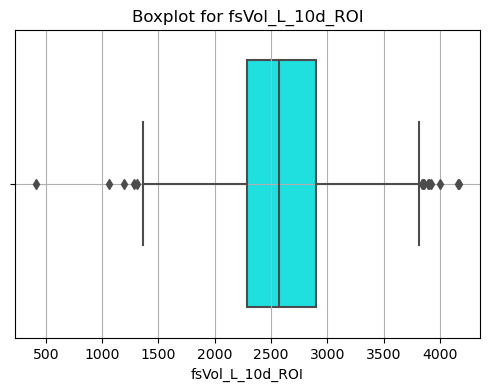

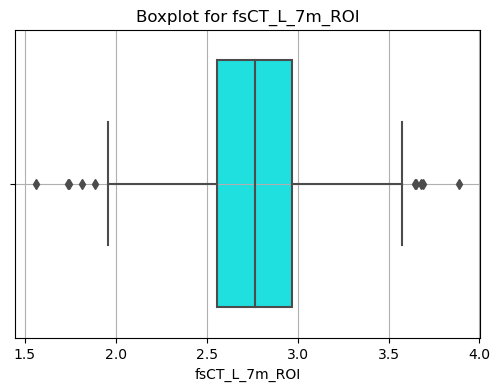

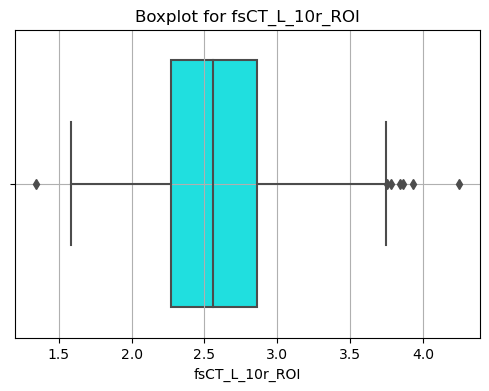

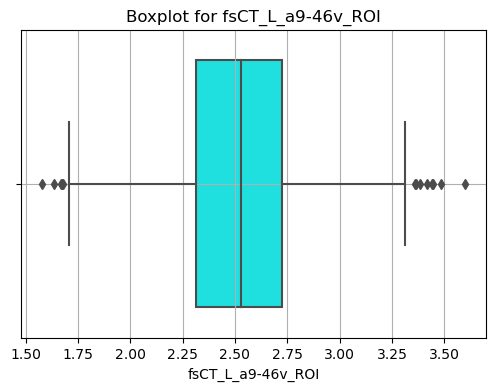

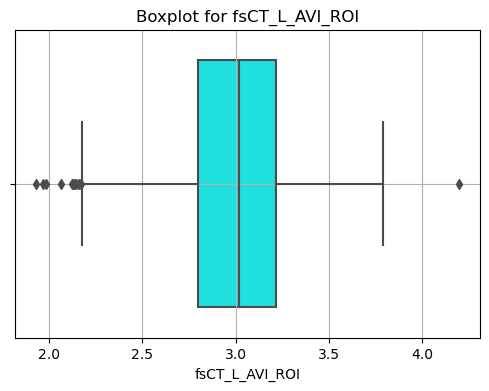

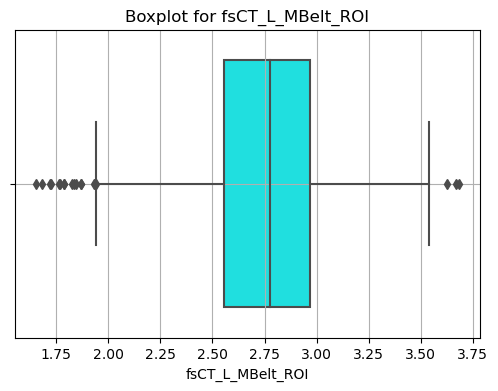

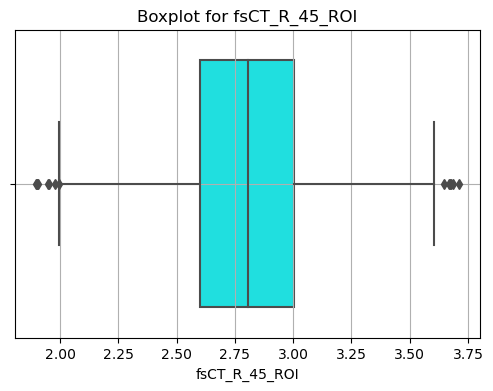

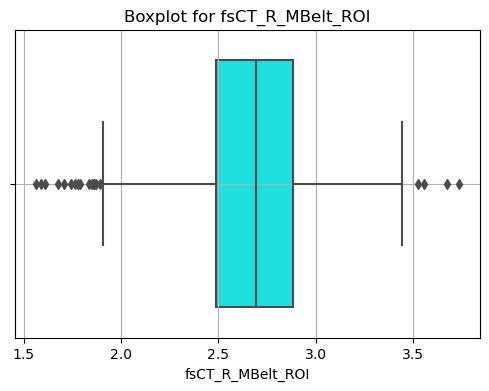

In [47]:
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[feature], color='cyan')
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

In [48]:
#dont we need to remove outliers?
#oh if we do we also have to remove ages related to the rows, but we already randomized the data

In [49]:
#with IQR but still we have a few outliers
for feature in X.columns:
    Q1= X[feature].quantile(0.25)
    Q3= X[feature].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    X[feature] = np.where(
        (X[feature] < low_bound )| (X[feature] > up_bound), 
        X[feature].median(),
        X[feature])

C:\Users\sabzi\AppData\Local\Temp\ipykernel_17316\94170500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = np.where(


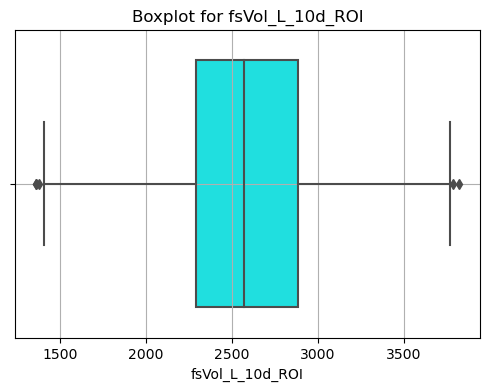

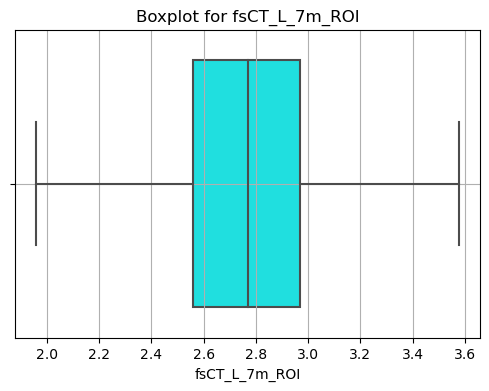

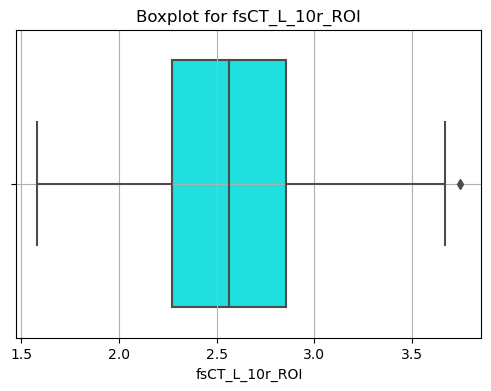

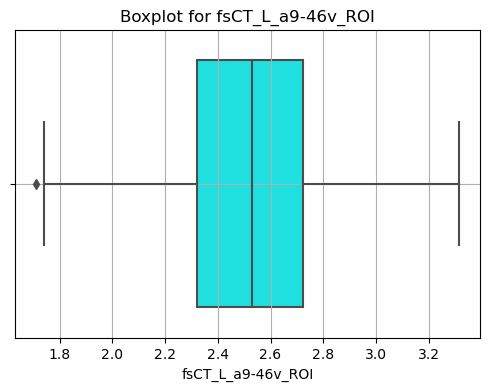

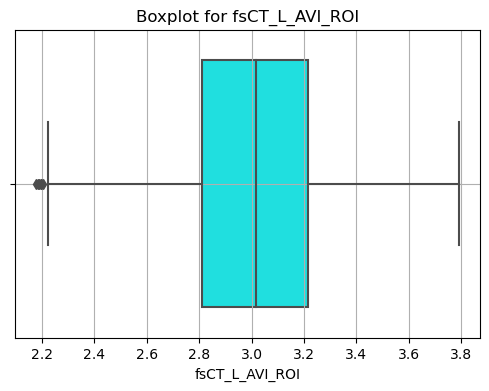

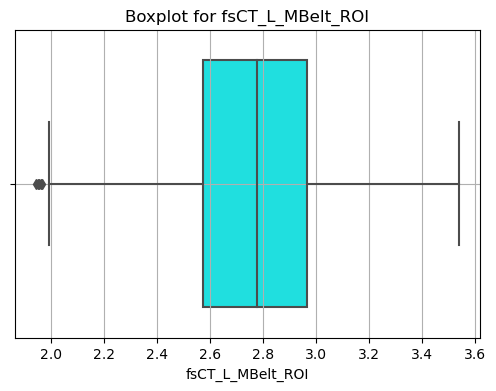

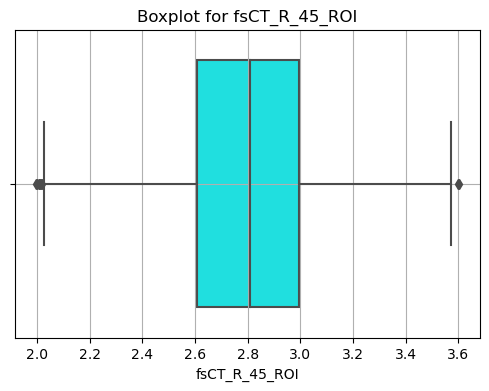

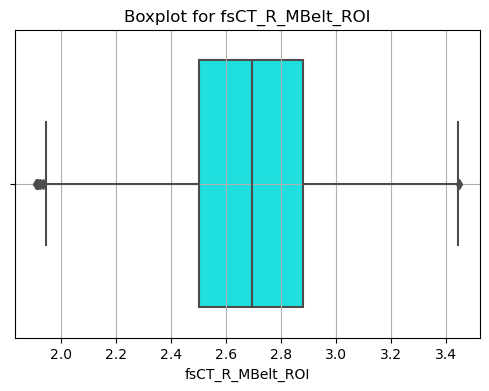

In [50]:
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[feature], color='cyan')
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()

In [51]:
#with Zscore
z = np.abs(zscore(X))
outlier_ind = np.where(z > 3)
outlier_ind

(array([], dtype=int64), array([], dtype=int64))

it seems with IQR and z = 3 we get the same result

concat to get a single df

In [52]:
all = pd.concat([X,y], axis = 1)
all

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0              2508.0          2.818           2.668              2.647   
1              2029.0          2.924           2.386              2.553   
2              2779.0          2.822           2.636              2.724   
3              2932.0          3.055           3.037              3.088   
4              3121.0          3.137           3.472              2.527   
...               ...            ...             ...                ...   
999            2040.0          2.767           2.324              2.387   
1000           3089.0          2.815           2.377              2.826   
1001           2982.0          2.630           2.840              2.769   
1002           2431.0          2.846           2.991              2.764   
1003           3327.0          3.292           3.020              2.964   

      fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  \
0              3.024             2.840          2.808             2.777   
1              3.325             2.807          3.074             2.944   
2              2.914             3.015          2.993             2.799   
3              2.972             3.019          2.863             2.694   
4              3.662             2.699          3.009             2.809   
...              ...               ...            ...               ...   
999            2.921             2.557          2.714             2.955   
1000           2.932             2.764          3.192             2.537   
1001           2.758             2.873          3.027             2.925   
1002           3.047             3.148          2.873             2.998   
1003           2.820             2.717          2.641             2.494   

            age  
0      8.893151  
1     12.000000  
2      8.390000  
3      8.300000  
4      7.772758  
...         ...  
999   20.000000  
1000  10.862000  
1001  11.200000  
1002   9.789041  
1003   6.194000  

[1004 rows x 9 columns]

# Normalization of data

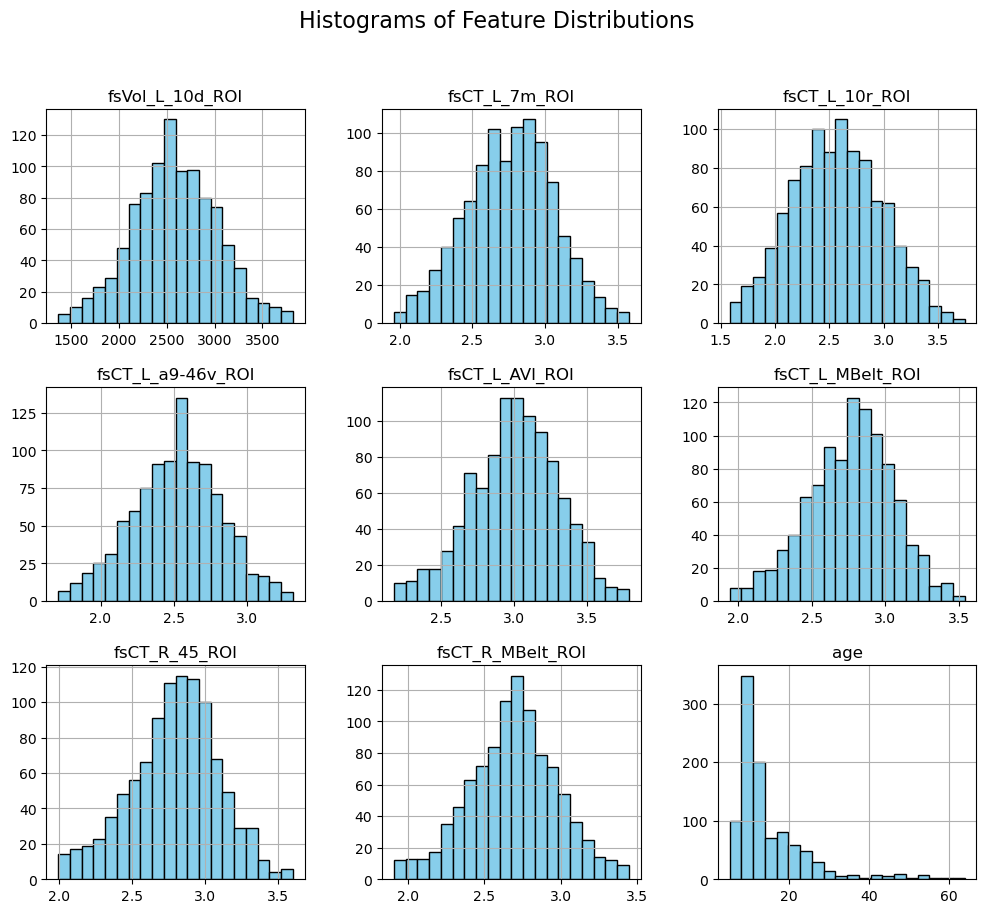

In [53]:
all.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Feature Distributions", fontsize=16)
plt.show()

In [54]:
# Assuming 'all' is your DataFrame
scaler = StandardScaler()

# Fit and transform the 'all' DataFrame
all_scaled = scaler.fit_transform(all)

# Convert the scaled data back into a DataFrame with original column names
all_scaled_df = pd.DataFrame(all_scaled, columns=all.columns)

# Verify the results
print("Scaled 'all' DataFrame:")
print(all_scaled_df.head())


Scaled 'all' DataFrame:
   fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0        -0.173386       0.199921        0.244021           0.424720   
1        -1.249082       0.548938       -0.438462           0.112452   
2         0.435202       0.213092        0.166576           0.680514   
3         0.778796       0.980270        1.137057           1.889722   
4         1.203235       1.250264        2.189824           0.026080   

   fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI       age  
0        0.056151          0.269472       0.053276          0.309722 -0.658406  
1        1.049364          0.155319       0.934659          0.886135 -0.328907  
2       -0.306817          0.874830       0.666268          0.385656 -0.711768  
3       -0.115434          0.888667       0.235517          0.023241 -0.721313  
4        2.161366         -0.218273       0.719283          0.420172 -0.777230  


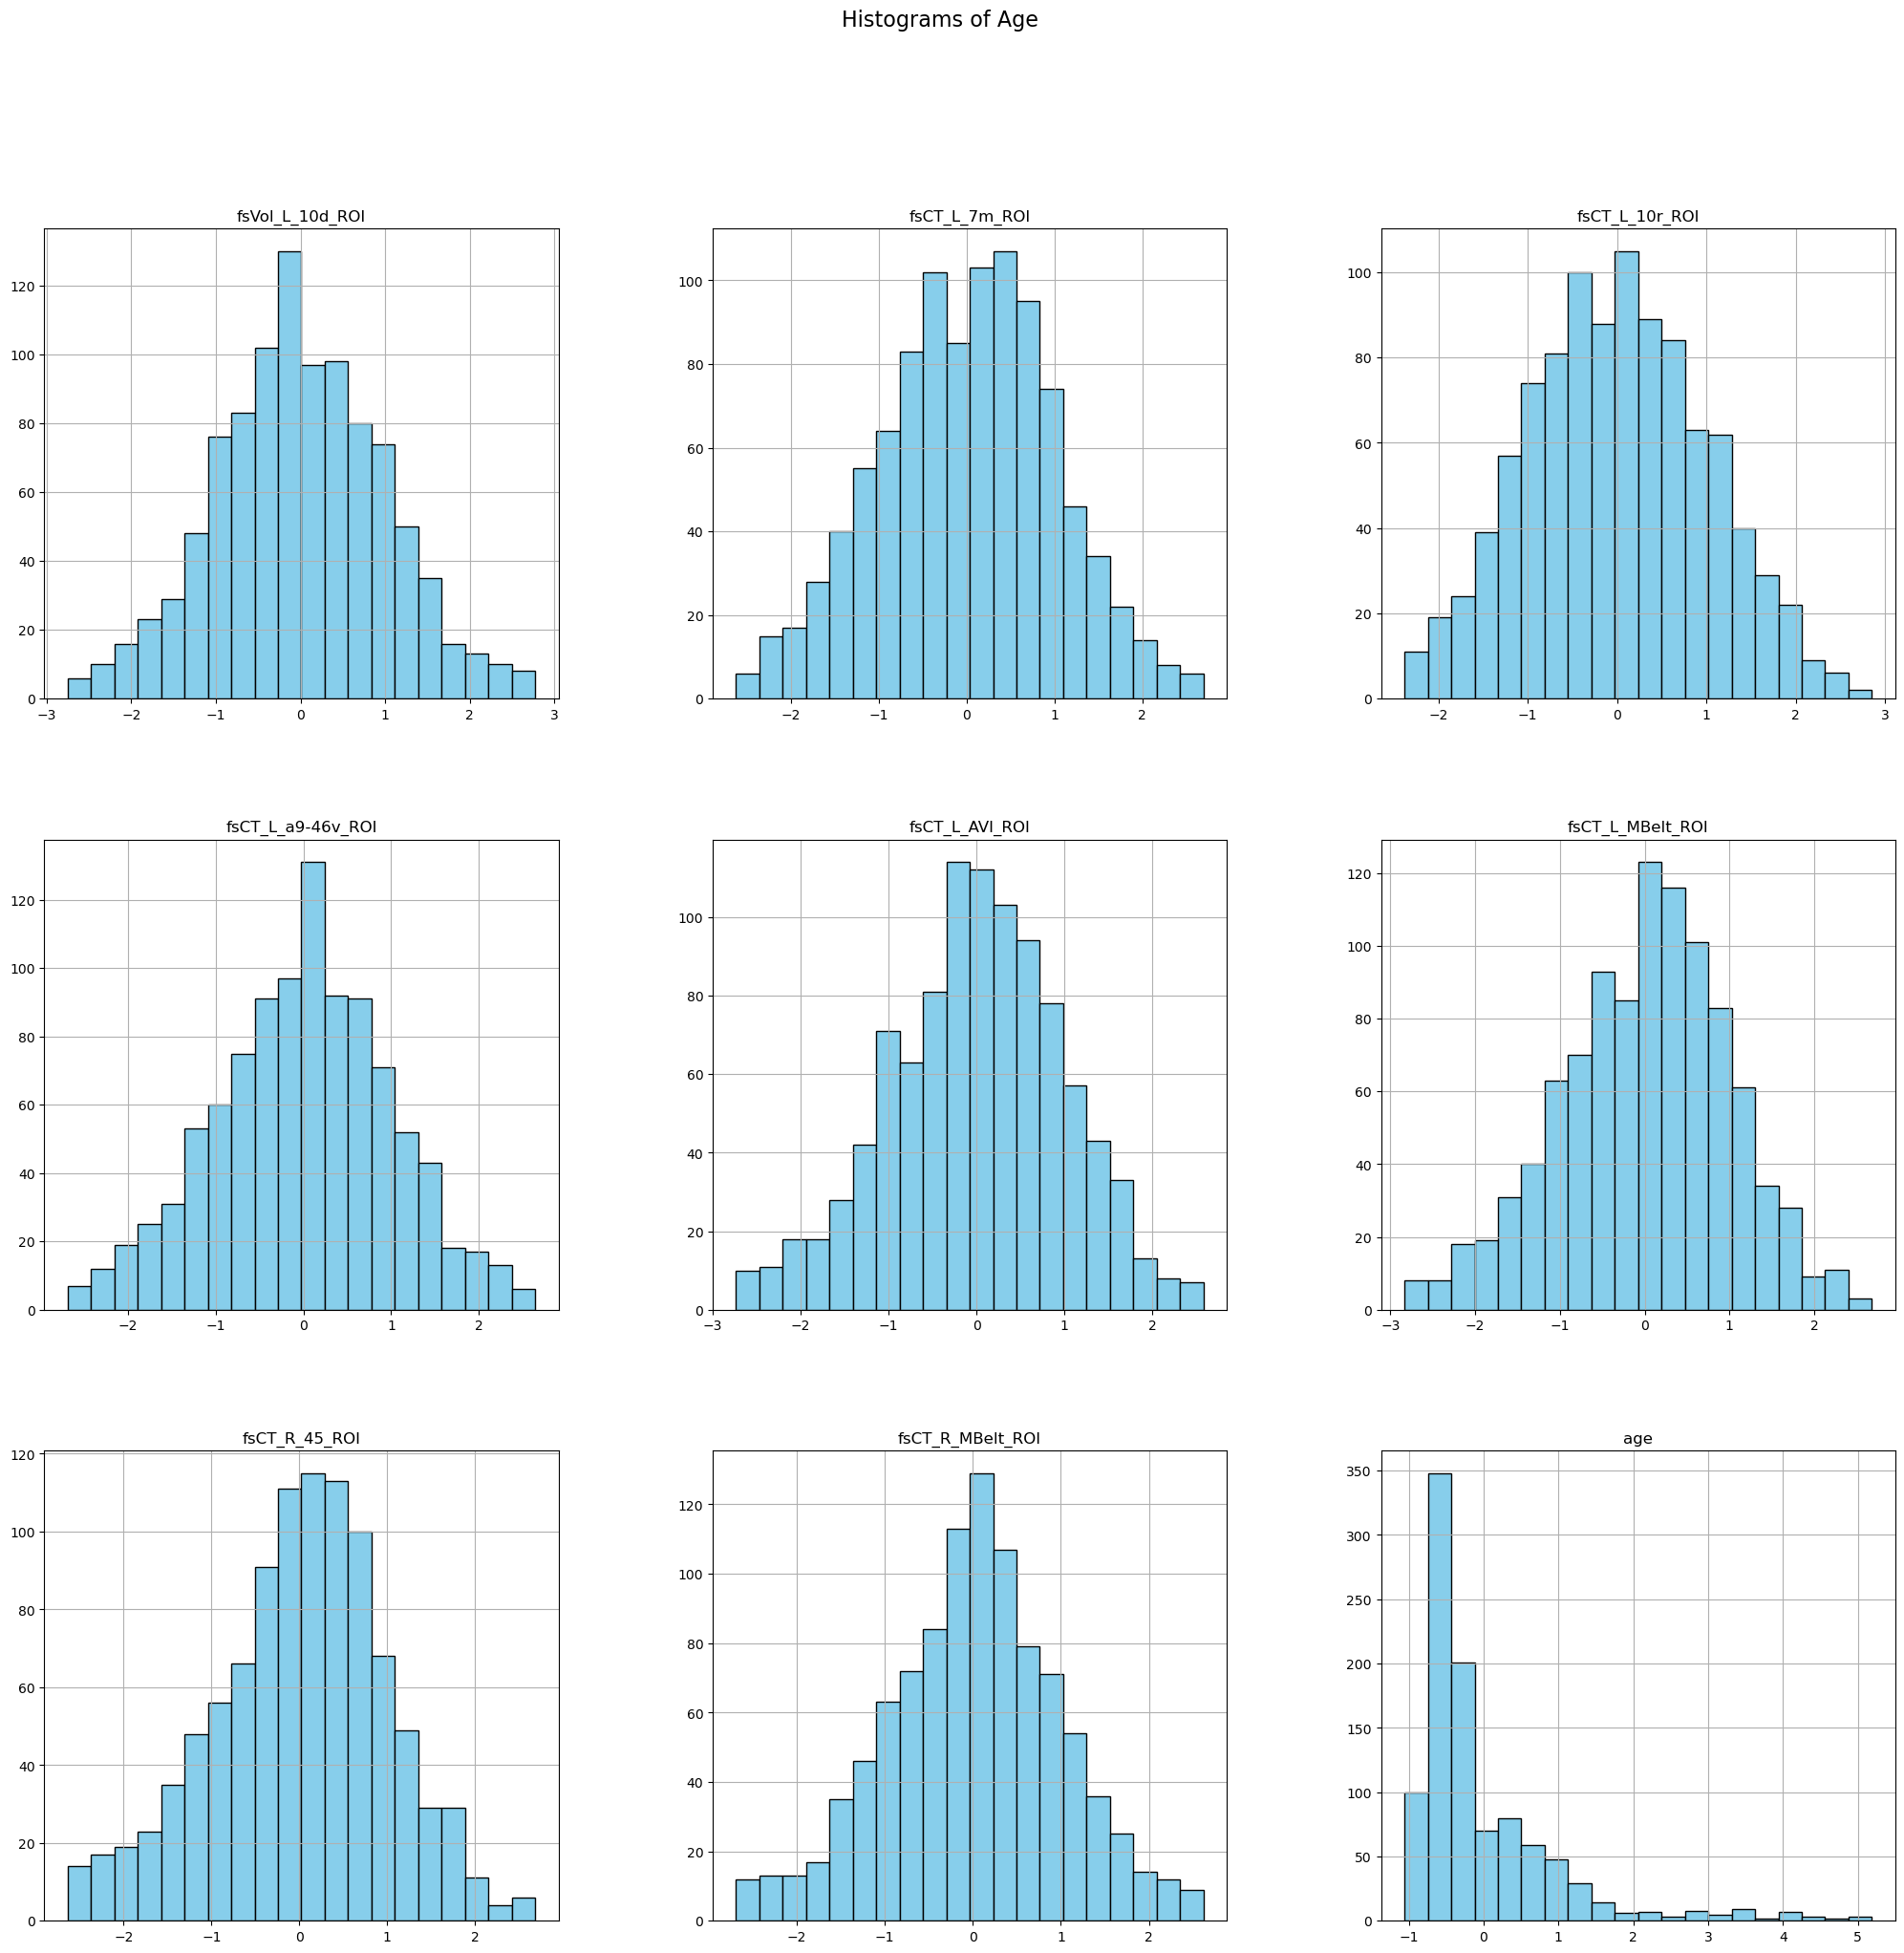

In [56]:
all_scaled_df.hist(bins=20, figsize=(25, 23), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Age", fontsize=16)
plt.show()

In [57]:
all = all_scaled_df

In [58]:
all

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0           -0.173386       0.199921        0.244021           0.424720   
1           -1.249082       0.548938       -0.438462           0.112452   
2            0.435202       0.213092        0.166576           0.680514   
3            0.778796       0.980270        1.137057           1.889722   
4            1.203235       1.250264        2.189824           0.026080   
...               ...            ...             ...                ...   
999         -1.224379       0.031998       -0.588512          -0.439000   
1000         1.131373       0.190043       -0.460244           1.019358   
1001         0.891081      -0.419090        0.660287           0.830004   
1002        -0.346306       0.292114        1.025730           0.813394   
1003         1.665852       1.760618        1.095915           1.477794   

      fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  \
0           0.056151          0.269472       0.053276          0.309722   
1           1.049364          0.155319       0.934659          0.886135   
2          -0.306817          0.874830       0.666268          0.385656   
3          -0.115434          0.888667       0.235517          0.023241   
4           2.161366         -0.218273       0.719283          0.420172   
...              ...               ...            ...               ...   
999        -0.283719         -0.709478      -0.258190          0.924102   
1000       -0.247422          0.006574       1.325648         -0.518655   
1001       -0.821572          0.383625       0.778926          0.820555   
1002        0.132044          1.334902       0.268652          1.072519   
1003       -0.616990         -0.156008      -0.500073         -0.667073   

           age  
0    -0.658406  
1    -0.328907  
2    -0.711768  
3    -0.721313  
4    -0.777230  
...        ...  
999   0.519539  
1000 -0.449598  
1001 -0.413751  
1002 -0.563392  
1003 -0.944667  

[1004 rows x 9 columns]

it seems that age became a minus value which might be a problem

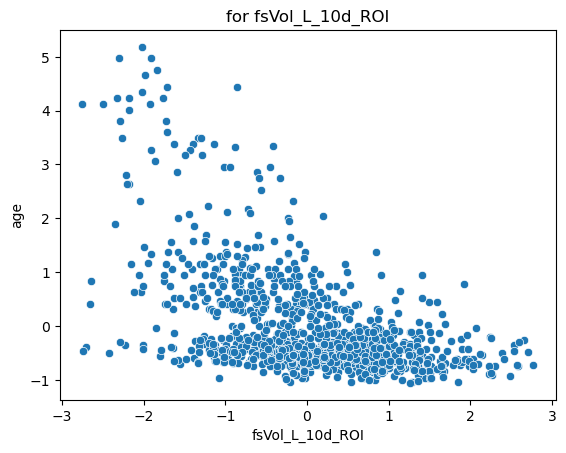

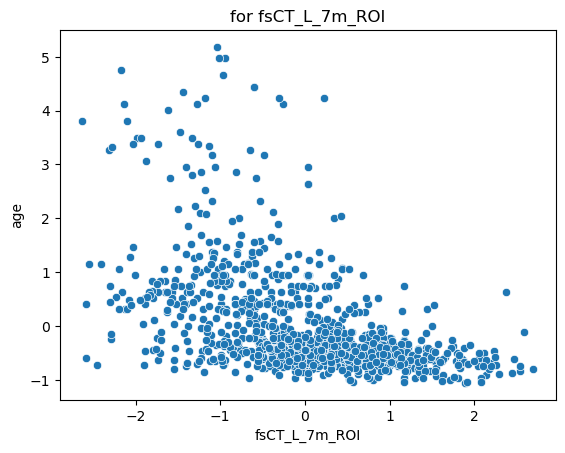

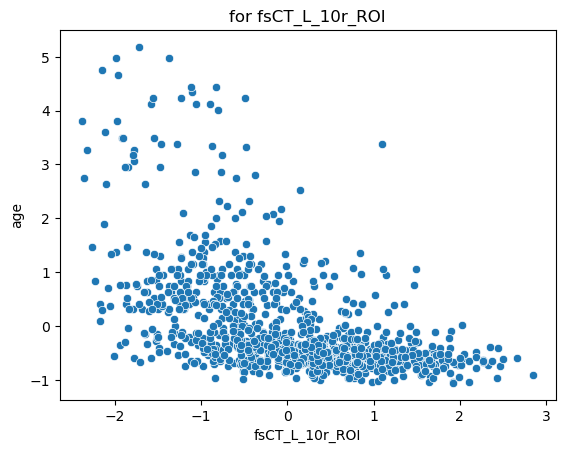

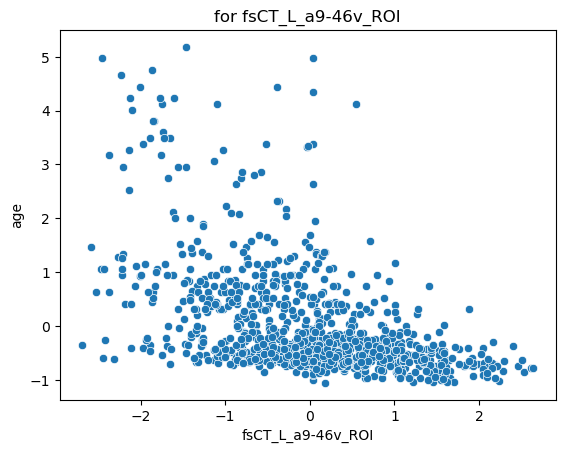

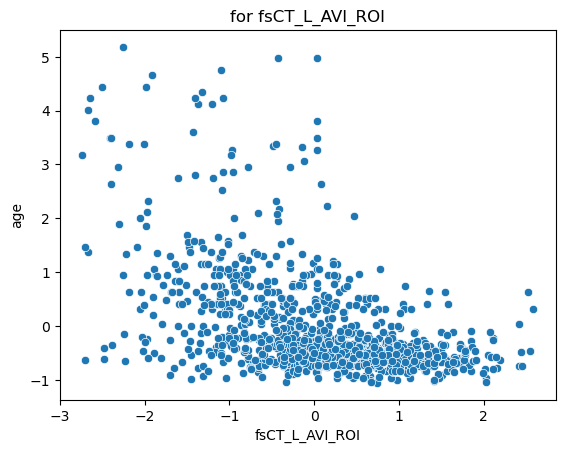

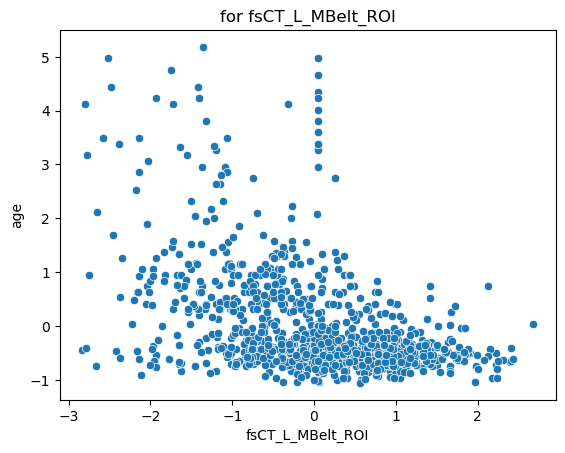

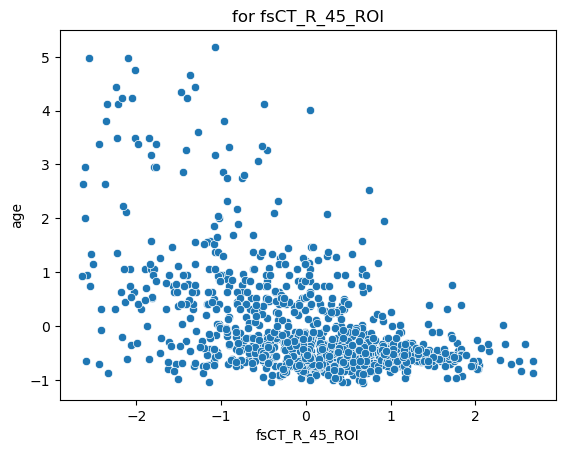

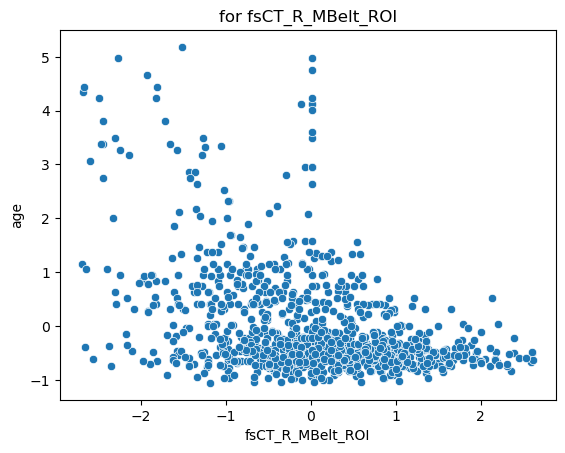

In [90]:
for feature in all.columns[: -1]:
    sns.scatterplot(x= all[feature] , y = all.iloc[: , -1])
    plt.title(f'for {feature}')
    plt.xlabel(feature)
    plt.ylabel('age')
    plt.show()

In [59]:
X

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0              2508.0          2.818           2.668              2.647   
1              2029.0          2.924           2.386              2.553   
2              2779.0          2.822           2.636              2.724   
3              2932.0          3.055           3.037              3.088   
4              3121.0          3.137           3.472              2.527   
...               ...            ...             ...                ...   
999            2040.0          2.767           2.324              2.387   
1000           3089.0          2.815           2.377              2.826   
1001           2982.0          2.630           2.840              2.769   
1002           2431.0          2.846           2.991              2.764   
1003           3327.0          3.292           3.020              2.964   

      fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
0              3.024             2.840          2.808             2.777  
1              3.325             2.807          3.074             2.944  
2              2.914             3.015          2.993             2.799  
3              2.972             3.019          2.863             2.694  
4              3.662             2.699          3.009             2.809  
...              ...               ...            ...               ...  
999            2.921             2.557          2.714             2.955  
1000           2.932             2.764          3.192             2.537  
1001           2.758             2.873          3.027             2.925  
1002           3.047             3.148          2.873             2.998  
1003           2.820             2.717          2.641             2.494  

[1004 rows x 8 columns]

In [61]:
y

0        8.893151
1       12.000000
2        8.390000
3        8.300000
4        7.772758
          ...    
999     20.000000
1000    10.862000
1001    11.200000
1002     9.789041
1003     6.194000
Name: age, Length: 1004, dtype: float64

In [73]:
X = all.filter(like='fs')
y = all.iloc[:, -1]  
y = y.to_frame()

In [74]:
X

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
0           -0.173386       0.199921        0.244021           0.424720   
1           -1.249082       0.548938       -0.438462           0.112452   
2            0.435202       0.213092        0.166576           0.680514   
3            0.778796       0.980270        1.137057           1.889722   
4            1.203235       1.250264        2.189824           0.026080   
...               ...            ...             ...                ...   
999         -1.224379       0.031998       -0.588512          -0.439000   
1000         1.131373       0.190043       -0.460244           1.019358   
1001         0.891081      -0.419090        0.660287           0.830004   
1002        -0.346306       0.292114        1.025730           0.813394   
1003         1.665852       1.760618        1.095915           1.477794   

      fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
0           0.056151          0.269472       0.053276          0.309722  
1           1.049364          0.155319       0.934659          0.886135  
2          -0.306817          0.874830       0.666268          0.385656  
3          -0.115434          0.888667       0.235517          0.023241  
4           2.161366         -0.218273       0.719283          0.420172  
...              ...               ...            ...               ...  
999        -0.283719         -0.709478      -0.258190          0.924102  
1000       -0.247422          0.006574       1.325648         -0.518655  
1001       -0.821572          0.383625       0.778926          0.820555  
1002        0.132044          1.334902       0.268652          1.072519  
1003       -0.616990         -0.156008      -0.500073         -0.667073  

[1004 rows x 8 columns]

In [75]:
y

age
0    -0.658406
1    -0.328907
2    -0.711768
3    -0.721313
4    -0.777230
...        ...
999   0.519539
1000 -0.449598
1001 -0.413751
1002 -0.563392
1003 -0.944667

[1004 rows x 1 columns]

In [76]:
X_train , X_test, y_train , y_test =  train_test_split(X,y, test_size = 0.2, random_state = 6)

In [77]:
X_test

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
150         0.790024       0.868321        0.742572           0.404788   
408        -0.110506      -2.197099       -0.910392          -1.026994   
570         0.073642      -1.077612       -2.231796          -0.402458   
842         0.134276      -0.340067       -0.348917           0.079232   
181         0.572190       1.266727        0.101232           1.434608   
..               ...            ...             ...                ...   
37         -0.584352      -0.807617       -0.370698          -1.020350   
758         1.034807      -1.390409        1.478299          -0.073580   
493        -1.907076      -1.403580       -1.544472          -2.202983   
452         1.939829       0.641131        0.365029           0.923020   
922         0.644053      -0.000928       -1.355700          -0.442322   

     fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
150        2.111871          1.165402       2.014849          0.758426  
408       -2.055664         -1.723020      -2.418571         -1.502354  
570       -0.828171         -0.245947      -0.012993         -0.280497  
842       -0.333215         -0.754448       0.242144          0.054306  
181       -0.659886          0.245258       0.162621         -0.494494  
..              ...               ...            ...               ...  
37         0.481814         -1.930572      -1.152826         -0.573881  
758        0.702894          0.058462      -0.132278         -1.619707  
493       -2.220649         -1.653836      -2.534542         -1.526515  
452        1.181352          0.324819       0.006888          0.913747  
922       -2.025966         -0.221733      -2.166747          0.085370  

[201 rows x 8 columns]

In [78]:
X_train

fsVol_L_10d_ROI  fsCT_L_7m_ROI  fsCT_L_10r_ROI  fsCT_L_a9-46v_ROI  \
152        -0.539437      -0.020684        0.304525           0.909732   
240        -2.652652      -1.406872       -1.868773          -1.096756   
774        -0.550666       1.928541        0.035888          -0.302798   
942        -0.166649       0.963807       -0.733721           0.338348   
232         0.066905      -0.261044        0.183517          -0.522050   
..               ...            ...             ...                ...   
618         1.656869       0.321748        0.863580           0.544312   
980        -1.013283      -0.985418        0.689329          -0.409102   
227        -0.036398       0.726739        1.628349           1.085798   
713        -0.220546       1.819885        0.878101           0.438008   
906        -0.353043       0.239432       -0.455403          -1.196416   

     fsCT_L_AVI_ROI  fsCT_L_MBelt_ROI  fsCT_R_45_ROI  fsCT_R_MBelt_ROI  
152        0.673197          0.383625       2.346196          0.216529  
240       -1.161442         -2.058561      -1.152826         -2.292764  
774        0.613802          0.937095       0.189128          1.196776  
942        0.874479          0.279850       1.885624         -0.225272  
232       -0.174829         -1.110744      -0.635925          0.689395  
..              ...               ...            ...               ...  
618        0.511511         -0.968917      -0.818166         -1.029488  
980        1.445329         -0.816713      -0.513327         -1.481644  
227        1.379335          0.497779       0.046649         -0.818942  
713       -0.112134          0.881748       1.713324          1.465999  
906       -0.273820         -0.138712      -0.443744          0.406366  

[803 rows x 8 columns]

In [79]:
y_test

age
150 -0.254523
408  0.307428
570  0.837706
842 -0.046092
181 -0.788128
..        ...
37  -0.541018
758 -0.275879
493  1.341471
452 -0.615693
922 -0.214367

[201 rows x 1 columns]

In [80]:
y_train

age
152 -0.344597
240  0.413483
774 -0.717972
942 -0.541018
232 -0.382952
..        ...
618 -0.746451
980 -0.585765
227 -0.655500
713 -0.541600
906  0.490215

[803 rows x 1 columns]

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred_train = model.predict(X_train)


In [83]:
y_pred_train

array([[-4.17112614e-01],
       [ 1.85385623e+00],
       [-3.42135130e-01],
       [-2.95374767e-01],
       [ 9.97376023e-02],
       [-4.75743789e-01],
       [ 7.46309061e-01],
       [ 8.57287858e-01],
       [-7.68001318e-01],
       [ 7.46897044e-01],
       [-7.14373695e-01],
       [-4.12429784e-01],
       [ 9.92637832e-01],
       [ 3.86384655e-01],
       [-8.24061967e-01],
       [ 4.33854499e-01],
       [-7.22203871e-01],
       [-6.26648435e-01],
       [-1.03273591e+00],
       [-4.38925534e-01],
       [ 2.42036563e-01],
       [ 1.10876746e+00],
       [ 2.83599626e-01],
       [-8.42867784e-01],
       [ 6.09010803e-01],
       [-9.49083137e-02],
       [ 1.62661442e+00],
       [-1.21532114e+00],
       [-1.33752713e+00],
       [-5.06018064e-02],
       [ 1.51611151e-01],
       [ 6.73905997e-01],
       [ 7.37175030e-01],
       [ 3.80512229e-01],
       [ 1.81869944e-01],
       [-9.54357053e-01],
       [ 6.56593241e-01],
       [ 3.03556246e-01],
       [-9.5

In [84]:
model.coef_


array([[-0.22897631, -0.11088943, -0.18146007, -0.09274852, -0.15427529,
        -0.0361037 , -0.11477786, -0.11162176]])

In [85]:
model.intercept_


array([0.00787945])

In [86]:
mse = mean_squared_error(y_train , y_pred_train)


In [87]:
mse


0.5115385642881011

In [88]:
r2 = r2_score(y_train , y_pred_train)
r2

0.513876061787931

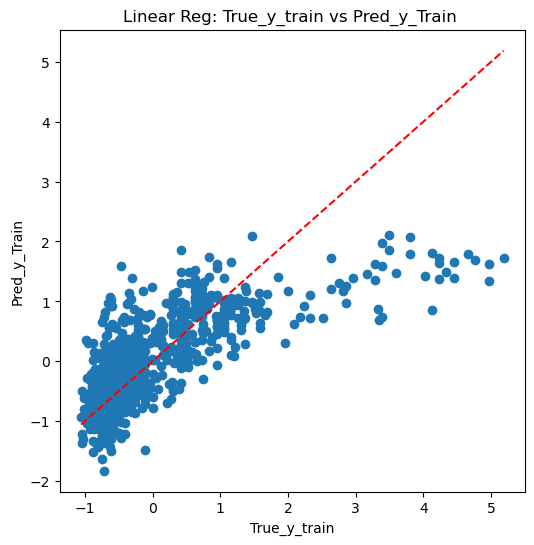

In [91]:
plt.figure(figsize = (6,6))
plt.scatter(y_train , y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--' )
plt.title('Linear Reg: True_y_train vs Pred_y_Train ')
plt.xlabel('True_y_train')
plt.ylabel('Pred_y_Train')
plt.show()

Degree: 2
Training MSE: 0.3954
Validation MSE: 0.3540

Degree: 3
Training MSE: 0.2992
Validation MSE: 0.4534

Degree: 4
Training MSE: 0.1000
Validation MSE: 2.8706



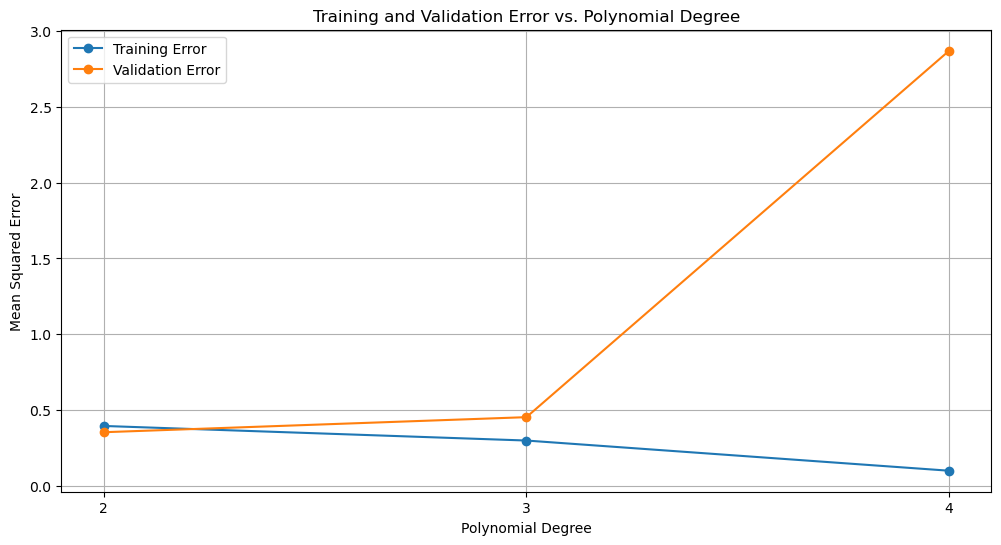

In [93]:
# Initialize lists to store errors for each degree
degrees = range(2, 5)
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
        
    # Initialize and train the regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    # Output the errors for each degree
    print(f"Degree: {degree}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Validation MSE: {test_mse:.4f}\n")

# Plotting the training and validation errors
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error vs. Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()
